In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import pi
import numpy as np

%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 99)

In [198]:
full_data.shape

(814, 49)

In [2]:
df = pd.read_csv("ts_centroids_corn.csv", index_col=0)
df.fips_code = df.fips_code.astype(str).apply(lambda x: x.zfill(5))
df.set_index('fips_code', inplace=True)

a = pd.read_csv("year_counts_corn.csv")
a.fips_code = a.fips_code.astype(str).apply(lambda x: x.zfill(5))
a.set_index('fips_code', inplace=True)

full_data = df[df.index.isin(a[a.year_count==47].index.values)]
full_data.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,longitude,latitude
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8,-85.804109,34.459800
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5,-87.654010,34.901407
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2,-87.310989,34.521676
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9,-86.981401,34.810099
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7,-86.550226,34.763090


In [3]:
years = [i for i in full_data.columns if not i.startswith("l")]

In [4]:
X = full_data[years]
X.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


In [5]:
y = X.pop("2016")
x = np.array(X)

In [6]:
x = sm.add_constant(x, prepend=True)
x

array([[   1. ,   35. ,   56. , ...,  140.5,  144.3,  151. ],
       [   1. ,   25. ,   42. , ...,  154.6,  184.4,  161.6],
       [   1. ,   30. ,   45. , ...,  172. ,  187.1,  140.3],
       ..., 
       [   1. ,   75. ,   91. , ...,  143.5,  182.8,  162.4],
       [   1. ,   75. ,   91. , ...,   98.5,  148.6,  144. ],
       [   1. ,   66. ,   83. , ...,  134.7,  149.5,  163.1]])

In [7]:
results = smf.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2016   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     79.03
Date:                Wed, 13 Dec 2017   Prob (F-statistic):          1.66e-257
Time:                        10:11:43   Log-Likelihood:                -3244.9
No. Observations:                 814   AIC:                             6584.
Df Residuals:                     767   BIC:                             6805.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0554      5.050      4.961      0.000      15.142      34.969
x1            -0.2322      0.050     -4.600      0.000      -0.331      -0.133
x2             0.0888      0.065      1.368      0.172      -0.039       0.216
x3             0.1614      0.067      2.423      0.016       0.031       0.292
x4             0.0637      0.065      0.984      0.326      -0.063       0.191
x5            -0.1089      0.054     -2.023      0.043      -0.215      -0.003
x6             0.0337      0.055      0.615      0.539      -0.074       0.142
x7            -0.1106      0.041     -2.708      0.007      -0.191      -0.030
x8            -0.0249      0.039     -0.646      0.518      -0.101       0.051
x9             0.1941      0.060      3.232      0.001       0.076       0.312
x10            0.0316      0.069      0.461      0.645      -0.103       0.166
x11            0.0105      0.039      0.269      0.788      -0.066       0.087
x12            0.0492      0.056      0.877      0.381      -0.061       0.159
x13            0.0352      0.064      0.550      0.582      -0.090       0.161
x14           -0.0236      0.042     -0.555      0.579      -0.107       0.060
x15           -0.1386      0.051     -2.744      0.006      -0.238      -0.039
x16            0.0535      0.051      1.051      0.293      -0.046       0.153
x17           -0.1271      0.047     -2.711      0.007      -0.219      -0.035
x18            0.0999      0.047      2.107      0.035       0.007       0.193
x19           -0.1964      0.031     -6.370      0.000      -0.257      -0.136
x20           -0.0633      0.039     -1.631      0.103      -0.140       0.013
x21            0.0810      0.053      1.526      0.127      -0.023       0.185
x22            0.0783      0.034      2.286      0.023       0.011       0.146
x23           -0.0784      0.048     -1.639      0.102      -0.172       0.016
x24           -0.1173      0.032     -3.641      0.000      -0.181      -0.054
x25            0.0170      0.050      0.342      0.733      -0.081       0.115
x26            0.1034      0.049      2.094      0.037       0.006       0.200
x27            0.0493      0.047      1.057      0.291      -0.042       0.141
x28           -0.0759      0.049     -1.553      0.121      -0.172       0.020
x29            0.0686      0.041      1.663      0.097      -0.012       0.150
x30           -0.0014      0.035     -0.039      0.969      -0.070       0.067
x31            0.0077      0.035      0.223      0.824      -0.060       0.076
x32            0.0666      0.039      1.721      0.086      -0.009       0.142
x33            0.1724      0.030      5.679      0.000       0.113       0.232
x34           -0.0388      0.037     -1.057      0.291      -0.111       0.033
x35           -0.0378      0.041     -0.915      0.360      -0.119       0.043
x3

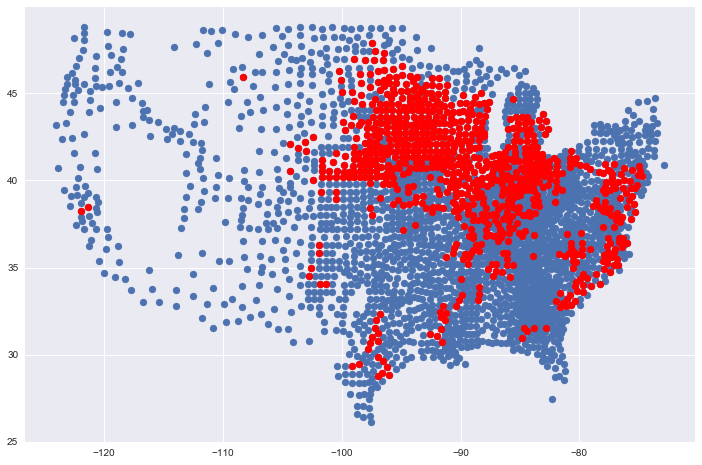

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude)
plt.scatter(full_data.longitude, full_data.latitude, c='r');

In [9]:
results.cov_params()

,const,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
const,25.502936,7.339691e-03,0.021902,0.003775,-0.015840,0.003507,0.069111,-0.007805,-0.024259,0.002595,-3.977455e-02,0.016864,-0.051113,-0.068035,-0.025588,0.017783,-0.024138,1.686347e-02,-0.001969,0.006470,-0.002746,0.045578,-0.001581,0.053394,-0.002063,-0.047319,-0.041338,0.006017,-0.043460,0.023122,0.003069,-0.041272,-0.028754,0.032389,0.031356,6.427325e-03,-0.013974,0.030188,0.007964,0.024631,-0.027280,1.453565e-02,0.012044,-1.798071e-02,-0.029654,-0.048392,-0.027092
x1,0.007340,2.547319e-03,-0.000438,-0.000138,-0.000314,-0.000409,0.000009,-0.000081,0.000124,-0.000394,2.873150e-04,-0.000188,-0.000278,0.000237,-0.000340,-0.000050,-0.000059,-6.789593e-07,-0.000089,0.000192,-0.000049,-0.000674,0.000050,0.000141,0.000024,0.000184,-0.000172,0.000085,-0.000159,-0.000259,0.000061,-0.000078,0.000425,0.000107,0.000111,-1.657604e-04,-0.000112,-0.000171,0.000183,0.000103,0.000063,3.314818e-05,-0.000012,-1.817758e-04,0.000253,-0.000144,-0.000001
x2,0.021902,-4.376812e-04,0.004218,-0.001451,-0.000325,-0.000260,-0.000614,-0.000221,-0.000273,-0.000075,-8.392370e-05,-0.000009,-0.000111,-0.000264,0.000259,0.000043,0.000109,2.189620e-05,-0.000468,0.000432,-0.000083,-0.000063,0.000043,-0.000143,0.000218,-0.000401,0.000304,0.000088,-0.000630,-0.000052,-0.000014,-0.000012,0.000015,-0.000180,0.000105,-3.509456e-06,0.000260,0.000128,-0.000061,0.000048,-0.000171,-1.106678e-04,-0.000040,1.013238e-04,0.000102,-0.000079,0.000343
x3,0.003775,-1.379633e-04,-0.001451,0.004436,-0.001810,0.000257,0.000023,-0.000098,0.000137,-0.000005,-8.464194e-04,-0.000238,0.000163,-0.000116,-0.000152,0.000265,-0.000031,-2.182485e-04,0.000335,-0.000228,0.000086,0.000067,-0.000094,-0.000015,0.000026,0.000108,-0.000179,-0.000289,-0.000051,0.000076,-0.000304,0.000379,-0.000112,0.000045,0.000108,9.887587e-05,-0.000179,0.000034,-0.000249,0.000039,-0.000179,4.079872e-04,-0.000015,1.923130e-04,-0.000081,0.000005,-0.000268
x4,-0.015840,-3.141554e-04,-0.000325,-0.001810,0.004187,-0.000199,-0.000573,-0.000156,0.000224,-0.000653,4.468950e-04,0.000082,-0.000638,-0.000702,0.000272,0.000001,-0.000010,6.043522e-06,-0.000045,-0.000031,-0.000090,0.000234,-0.000200,-0.000150,0.000108,0.000262,0.000168,-0.000139,0.000356,-0.000262,0.000254,-0.000074,0.000327,-0.000362,0.000298,-1.647902e-04,-0.000291,0.000152,0.000313,-0.000074,-0.000370,-9.722842e-05,0.000139,1.743500e-06,-0.000169,0.000133,0.000206
x5,0.003507,-4.092728e-04,-0.000260,0.000257,-0.000199,0.002898,-0.000398,-0.000444,-0.000162,-0.000164,-2.316582e-04,-0.000332,-0.000256,-0.000413,0.000129,-0.000373,0.000268,3.001947e-04,0.000072,-0.000178,0.000222,0.000323,-0.000281,-0.000139,-0.000157,0.000128,-0.000333,-0.000464,0.000224,0.000406,0.000240,-0.000134,-0.000094,-0.000113,-0.000246,3.129763e-04,-0.000031,0.000048,-0.000073,0.000105,0.000058,8.599502e-05,0.000102,-1.415324e-05,0.000056,0.000113,-0.000246
x6,0.069111,8.875311e-06,-0.000614,0.000023,-0.000573,-0.000398,0.003015,-0.000293,-0.000224,0.000071,-9.174385e-04,0.000193,-0.000069,-0.000565,-0.000274,0.000014,-0.000078,2.596322e-04,0.000218,0.000104,-0.000117,-0.000373,0.000124,0.000301,-0.000315,-0.000110,0.000167,0.000089,-0.000052,0.000324,-0.000032,-0.000176,-0.000205,0.000314,-0.000410,7.248739e-05,0.000061,0.000034,-0.000106,-0.000081,0.000448,1.773402e-04,-0.000125,-1.786076e-04,-0.000082,-0.000086,-0.000049
x7,-0.007805,-8.117688e-05,-0.000221,-0.000098,-0.000156,-0.000444,-0.000293,0.001669,-0.000118,-0.000017,-4.179484e-04,-0.000007,-0.000021,0.000333,0.000015,-0.000354,-0.000039,1.223256e-04,-0.000160,-0.000081,0.000081,0.000191,0.000232,-0.000383,-0.000331,0.000006,0.000081,0.000167,0.000134,0.000132,0.000039,0.000132,-0.000181,0.000005,-0.000165,9.969659e-05,0.000015,-0.000240,-0.000002,0.000184,0.000163,2.159375e-04,-0.000080,-1.219662e-04,-0.000103,-0.000015,0.000048
x8,-0.02

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X[:-1], y[:-1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lm.coef_

array([-0.23527931,  0.08961804,  0.16165027,  0.064039  , -0.10882637,
        0.03419484, -0.10865206, -0.02479369,  0.19312838,  0.02703532,
        0.01212051,  0.04993095,  0.03724822, -0.02206548, -0.1404539 ,
        0.05172983, -0.12752057,  0.100592  , -0.19456169, -0.0646523 ,
        0.08268296,  0.07848865, -0.079893  , -0.11786204,  0.01804996,
        0.10187283,  0.05025676, -0.07355256,  0.06971822, -0.00202849,
        0.0083911 ,  0.06629616,  0.17151986, -0.03836732, -0.03695945,
       -0.04187096,  0.09860409,  0.1250566 ,  0.08329749,  0.08248347,
       -0.06197487,  0.06901189,  0.08794396,  0.06371515,  0.13753154,
        0.14518406])

In [13]:
lm.predict(X[-1:])

array([ 157.97568913])

In [14]:
y[-1:]

fips_code
56015    147.4
Name: 2016, dtype: float64

In [15]:
X = full_data[years]
X.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


# Predict for ony 2016, using all other years data

In [16]:
X_train = X.copy()
y_train = X_train.pop("2016")

preds = []

for i in range(X.shape[0]):
    x = X_train[:i].append(X_train[i+1:])
    y = y_train[:i].append(y_train[i+1:])
    lm = LinearRegression()
    lm.fit(x, y)
    y_pred = lm.predict(X_train[i:i+1])
    preds.append(y_pred[0])

In [17]:
X_train.tail()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55133,79.0,102.0,93.0,75.0,76.9,87.4,51.1,98.5,91.1,96.1,109.8,104.1,106.3,100.9,95.6,70.3,123.7,120.3,53.3,121.3,118.6,110.0,98.6,106.1,148.2,100.0,115.0,133.0,140.0,123.0,123.0,114.0,117.0,120.0,132.0,141.0,156.0,143.0,119.0,135.0,152.4,147.6,96.7,153.3,169.9,165.8
55135,77.0,95.0,84.0,71.0,65.5,69.1,72.8,91.0,90.4,92.5,102.5,95.5,111.6,98.1,98.1,100.8,103.8,108.5,74.1,106.0,110.4,111.7,103.2,87.9,122.5,110.0,112.0,123.0,121.0,143.0,131.0,102.0,133.0,133.0,115.0,144.0,124.0,122.0,135.0,135.0,149.8,138.4,128.5,151.4,141.6,153.2
55137,75.0,91.0,93.0,89.0,72.5,62.6,71.6,97.9,93.3,92.8,93.4,120.3,103.9,84.8,107.0,120.1,117.2,113.3,78.2,106.2,109.7,117.1,102.4,88.0,128.1,99.0,106.0,120.0,116.0,133.0,131.0,122.0,130.0,109.0,112.0,156.0,121.0,136.0,131.0,150.0,145.2,172.9,118.1,143.5,182.8,162.4
55141,75.0,91.0,88.0,76.0,64.1,60.6,72.0,90.6,89.6,95.0,91.4,101.6,105.4,89.4,90.6,93.7,96.9,113.1,66.9,99.6,110.0,107.7,91.4,74.4,127.8,106.0,85.0,132.0,129.0,137.0,122.0,123.0,142.0,99.0,117.0,150.0,129.0,125.0,120.0,139.0,134.5,148.1,109.6,98.5,148.6,144.0
56015,66.0,83.0,94.0,87.9,78.6,85.1,93.1,94.0,89.5,89.8,102.9,113.3,109.2,110.5,105.4,100.0,119.7,117.7,130.8,96.9,128.0,126.0,101.0,82.0,130.4,107.0,131.0,139.0,135.0,122.0,137.0,131.0,119.0,134.0,134.0,147.0,133.0,128.0,133.0,145.0,130.8,138.4,146.4,134.7,149.5,163.1


In [18]:
lr_preds = preds.copy()
lr_preds[:5]

[130.72350731783783,
 153.43661218686995,
 135.79252298170852,
 152.88554713442949,
 160.12212949306286]

In [19]:
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, preds))))
print("R2: {:.4f}".format(r2_score(y_train, preds)))

RMSE: 13.9706
R2: 0.7998


In [20]:
lr_years = {}

for year in X.columns.values:
    
    X_train = X.copy()
    y_train = X_train.pop(year)
    preds = []

    for i in range(X.shape[0]):
        x = X_train[:i].append(X_train[i+1:])
        y = y_train[:i].append(y_train[i+1:])
        lm = LinearRegression()
        lm.fit(x, y)
        y_pred = lm.predict(X_train[i:i+1])
        preds.append(y_pred[0])
        
    lr_years[year] = preds

In [22]:
lin_reg_preds_df = pd.DataFrame(lr_years)
lin_reg_preds_df.index = full_data.index

lin_reg_preds_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,34.631913,52.027978,66.814497,52.135411,43.958523,53.984681,81.235221,24.247766,64.287278,68.299510,26.219179,63.355199,75.479457,45.574938,79.350182,88.215408,55.396023,72.617912,65.263410,78.005847,66.967759,67.843385,101.693782,66.815073,97.979122,88.299342,100.926841,95.059062,57.812295,89.141565,86.286238,105.867050,56.563480,120.034608,116.143169,123.651536,87.480963,72.596041,99.193913,126.399514,95.518035,94.653829,79.353518,134.810228,147.448038,133.907450,130.723507
01077,29.415114,41.895777,51.915774,51.655534,48.866556,39.352884,59.861229,41.093787,49.663385,73.128657,29.614474,53.889996,80.578366,40.615976,66.793414,80.977360,70.968125,66.053112,61.148823,83.111639,58.575811,71.866472,95.779805,75.779570,103.800693,90.651495,84.017000,81.167818,70.603340,99.338006,104.170674,115.712793,80.212457,123.662544,139.820950,116.073618,97.861012,103.269297,104.329036,119.431629,124.850046,97.739608,76.048299,156.332269,138.680504,148.003314,153.436612
01079,18.198196,46.449360,50.477922,44.738271,32.534203,39.648152,46.527074,24.382418,48.081792,62.506544,22.990114,50.556651,75.296052,54.781346,60.867761,82.081520,60.907721,80.232002,43.663604,77.227716,58.575005,80.051570,90.029272,86.327278,106.654974,111.209349,85.848600,91.398446,81.482584,111.512621,102.889844,120.699672,106.830324,125.772575,143.773502,135.846226,104.362942,108.286468,110.953631,123.918048,109.713222,101.469857,80.252130,160.273579,159.071086,158.881209,135.792523
01083,23.967064,37.567118,61.323095,49.077709,51.365954,45.743892,56.995486,41.403150,55.988429,75.899655,33.360790,61.239520,78.586320,46.571050,75.121494,81.953664,67.058363,84.119348,63.917828,74.551628,61.804820,66.670042,106.586049,79.573841,114.379134,92.418932,88.954674,88.409716,84.744503,110.698368,107.856285,113.449439,85.372259,134.879927,152.836829,116.070690,112.002282,101.339767,102.618008,136.899601,130.782220,121.791799,101.553081,163.351575,160.138222,153.310179,152.885547
01089,27.189102,47.823659,69.734348,59.231472,54.564240,60.225393,56.458713,34.039434,61.088412,76.813477,34.815273,74.169754,84.996112,52.354667,82.554759,84.901750,50.796306,79.086342,45.321664,82.214954,68.939108,70.605963,103.849472,82.820937,109.510310,89.144553,97.838841,93.308386,68.463263,110.153528,101.747371,122.584843,91.161127,142.219283,138.702639,123.609595,117.480642,105.363890,113.647271,128.156601,121.447241,137.184736,139.459193,159.937314,156.057793,152.455776,160.122129


# Save results (Using all years to predict the missing year)

In [23]:
lin_reg_preds_df.to_csv("lin_reg_preds.csv")

# Metrics for Linear Regression

In [25]:
def mape(y_pred,y_true):
    y_pred = np.asarray(y_pred)
    y_true = np.asarray(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
lin_reg_RMSE = np.sqrt(mean_squared_error(X, lin_reg_preds_df))
lin_reg_R2 = r2_score(X, lin_reg_preds_df)
lin_reg_MAPE = mape(X, lin_reg_preds_df)
lin_reg_MAE = mean_absolute_error(X, lin_reg_preds_df)

print("Linear Regression RMSE: {:.4f}".format(lin_reg_RMSE))
print("Linear Regression R2: {:.4f}".format(lin_reg_R2))
print("Linear Regression MAPE: {:.4f}".format(lin_reg_MAPE))
print("Linear Regression MAE: {:.4f}".format(lin_reg_MAE))

Linear Regression RMSE: 12.5528
Linear Regression R2: 0.7873
Linear Regression MAPE: 9.3826
Linear Regression MAE: 9.3809


In [29]:
lin_reg_r2 = {}
lin_reg_rmse = {}
lin_reg_mape = {}
lin_reg_mae = {}

for i in lin_reg_preds_df.columns:
    lin_reg_rmse[i] = np.sqrt(mean_squared_error(X[i], lin_reg_preds_df[i]))
    lin_reg_r2[i] = r2_score(X[i], lin_reg_preds_df[i])
    lin_reg_mape[i] = mape(X[i], lin_reg_preds_df[i])
    lin_reg_mae[i] = mean_absolute_error(X[i], lin_reg_preds_df[i])

In [30]:
lin_reg_metrics_df = pd.DataFrame({"RMSE": lin_reg_rmse, "R2": lin_reg_r2,
                                  "MAPE": lin_reg_mape, "MAE": lin_reg_mae})
lin_reg_metrics_df.head()

,MAE,MAPE,R2,RMSE
1970,7.818793,12.916341,0.796647,9.825326
1971,5.933034,8.520892,0.884644,7.733437
1972,5.797989,7.304483,0.881540,7.541583
1973,5.885673,7.566869,0.867272,7.733574
1974,7.291456,11.729826,0.789542,9.274321


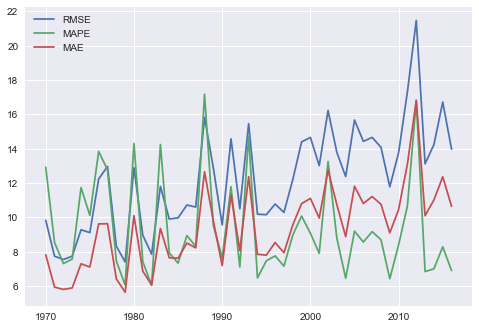

In [32]:
lin_reg_metrics_df[['RMSE', 'MAPE', 'MAE']].plot();

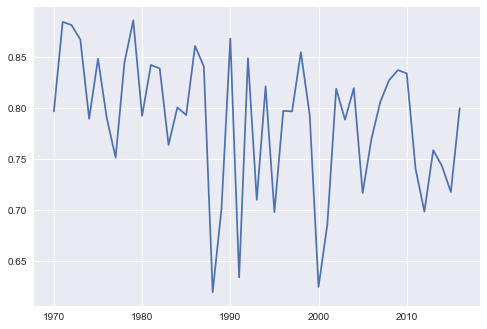

In [33]:
lin_reg_metrics_df['R2'].plot();

# Weighted LR (Euclidean Distance)

In [34]:
dist = DistanceMetric.get_metric("euclidean")
full_spatial = full_data[['latitude', 'longitude']]

euc_dist_df = pd.DataFrame(dist.pairwise(full_spatial))

In [35]:
euc_dist_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
809,8.916203,8.142841,8.554438,8.314081,8.439477,6.977595,7.555144,7.259588,7.969257,33.354128,33.961895,16.275440,14.438094,13.329268,13.111524,13.629866,12.312718,11.784745,12.063971,12.700282,12.256206,12.558532,12.301236,4.183361,3.914536,2.025781,1.886288,3.611753,2.880058,3.606099,4.551224,3.745468,1.217322,3.249933,3.386120,3.968710,4.081965,2.422393,5.063992,3.178140,5.256040,4.214437,1.736860,3.875086,3.421744,2.471861,2.321188,4.011025,4.435795,...,3.708909,4.959769,3.613849,1.122656,2.635822,1.114706,0.566453,4.076784,3.436311,0.757967,2.406407,1.341043,1.076993,1.830948,2.818889,0.471374,2.023583,0.513296,1.648825,2.947738,1.861851,1.207743,2.377064,1.356248,2.492290,2.008257,1.407046,4.014492,4.455539,4.804423,1.886189,0.364086,2.154806,0.841888,3.746691,4.612137,1.693688,1.829928,0.789391,3.313554,2.594553,0.422698,4.522970,0.357943,0.000000,1.595314,1.442001,2.254469,16.075737
810,10.497799,9.658441,10.085333,9.861895,10.003185,8.231440,8.799250,8.503693,9.152045,32.934538,33.546086,15.916830,14.181544,14.437920,14.183080,14.765810,13.899824,13.366756,13.649694,14.295385,13.835461,14.138027,13.894316,5.003890,4.849358,3.117763,2.590133,4.676265,4.397554,4.934593,5.881882,5.247449,2.584277,4.760077,4.944604,5.423680,5.470624,3.943638,6.478338,4.186417,6.747852,5.309277,3.231891,4.623656,4.145283,3.328506,3.893991,5.520353,5.561798,...,2.791143,3.676572,2.391278,1.069512,2.319824,1.474604,1.085132,2.970033,2.335298,0.860834,2.366894,1.900589,0.674856,1.879152,1.846683,1.461914,1.272076,2.106290,1.350271,2.223140,2.153539,1.207142,0.902184,0.782313,1.734293,0.890277,0.502789,3.038828,3.466596,3.615024,0.536631,1.945613,1.828672,1.802427,2.389815,3.533248,1.434127,0.375893,1.265182,2.399457,2.064937,1.850946,3.167023,1.324118,1.595314,0.000000,0.452827,1.076889,15.571890
811,10.247538,9.347749,9.784081,9.573962,9.730042,7.833439,8.398159,8.103154,8.739174,32.597165,33.208066,15.561834,13.807307,14.569203,14.327307,14.887320,13.657591,13.213408,13.404625,14.097152,13.687162,13.881489,13.669970,4.561057,4.416528,2.724017,2.158219,4.259699,4.107839,4.567458,5.509614,4.942597,2.269341,4.463092,4.680535,5.095366,5.117620,3.660801,6.129144,3.765989,6.430612,4.893383,2.945739,4.177678,3.699669,2.899492,3.652598,5.218019,5.149349,...,2.525679,3.581136,2.250251,0.652847,1.900821,1.060404,0.878752,2.781324,2.133247,0.835917,1.921696,1.477506,0.370154,1.426362,1.575889,1.187944,0.891050,1.949669,1.676750,1.883678,1.702964,1.433246,0.939649,0.332364,1.385043,1.334800,0.834860,2.798352,3.236849,3.471014,0.445555,1.806005,1.397097,1.452043,2.329852,3.339398,0.984235,0.827646,1.355438,2.124149,1.674081,1.605718,3.111929,1.256587,1.442001,0.452827,0.000000,0.868897,15.245538
812,10.856652,9.847745,10.302123,10.119056,10.301902,8.095812,8.644794,8.353813,8.933409,31.873654,32.485579,14.871517,13.158826,15.436969,15.193407,15.755852,14.272380,13.945656,14.015304,14.774863,14.424264,14.472539,14.312002,4.612354,4.549069,3.094004,2.389058,4.486497,4.692088,4.968674,5.881568,5.486196,2.859877,5.028438,5.299925,5.587438,5.549221,4.265152,6.558948,3.986031,6.933340,5.111054,3.561571,4.204395,3.743088,3.103505,4.320421,5.763246,5.378901,...,1.714552,2.718623,1.382177,1.215961,1.506488,1.521606,1.690945,1.918791,1.273670,1.704476,1.721350,1.828918,1.192625,1.457874,0.775736,1.913048,0.535637,2.743222,2.427044,1.205762,1.797104,2.256963,0.525361,0.904140,0.769228,1.862006,1.577108,1.964113,2.395473,2.602137,0.540576,2.615160,1.147276,2.030747,1.493852,2.479708,1.032899,1.319085,2.221048,1.325561,1.170782,2.332752,2.268502,2.111975,2.254469,1.076889,0.868897,0.000000,14.506242
813,20.056443,18.180001,18.646409,

In [36]:
euc_weights = euc_dist_df.copy()

euc_weights = euc_weights.applymap(lambda x: x**-1 if x != 0 else 0)
# euc_weights = euc_weights.apply(lambda x: x/sum(x), axis=1) # normalize

# Inverse Euclidean Distance used for weights 2016

In [38]:
X_train = X.copy()
y_train = X_train.pop("2016")
euc_preds = []

for i in range(X.shape[0]):
    x = X_train[:i].append(X_train[i+1:])
    y = y_train[:i].append(y_train[i+1:])
    w = euc_weights[i][:i].append(euc_weights[i][i+1:])
    lm = LinearRegression()
    lm.fit(x, y, w)
    y_pred = lm.predict(X_train[i:i+1])
    euc_preds.append(y_pred[0])

In [51]:
euc_lr_years = {}
euc_weights = euc_dist_df.copy()
euc_weights = euc_weights.applymap(lambda x: x**-1 if x != 0 else 0)

for year in X.columns.values:
    
    X_train = X.copy()
    y_train = X_train.pop(year)
    euc_preds = []

    for i in range(X.shape[0]):
        x = X_train[:i].append(X_train[i+1:])
        y = y_train[:i].append(y_train[i+1:])
        w = euc_weights[i][:i].append(euc_weights[i][i+1:])
        lm = LinearRegression()
        lm.fit(x, y, w)
        y_pred = lm.predict(X_train[i:i+1])
        euc_preds.append(y_pred[0])
        
    euc_lr_years[year] = euc_preds

In [52]:
euc_lr_preds_df = pd.DataFrame(euc_lr_years)
euc_lr_preds_df.index = full_data.index

euc_lr_preds_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,29.637910,51.043139,68.593829,52.904981,47.523543,52.934799,90.771321,28.850515,60.449788,67.409714,19.838700,60.731442,78.601236,48.349841,77.436736,89.388273,57.487702,62.263002,56.325304,81.738042,66.983213,78.140695,110.790566,53.998731,100.547378,86.029069,97.569065,90.588453,62.419043,89.158961,82.863577,111.377661,63.338039,120.899237,120.726674,134.440213,80.933426,63.158571,99.795555,113.535634,111.038264,101.570832,80.226457,131.078014,157.204984,142.702780,127.873161
01077,35.902550,42.510566,47.300305,52.566419,45.233932,39.753736,67.885485,41.338412,48.827505,66.432906,35.226124,57.347334,79.530209,37.404337,67.945857,82.438985,72.094908,56.519790,50.387579,87.013229,53.348516,74.974225,104.391968,69.059699,96.588320,87.562973,83.544244,83.102737,63.340913,109.443466,95.011477,127.795418,90.707508,132.384629,138.199236,125.153483,81.706194,96.325271,109.116201,119.966330,135.353769,107.554222,64.099363,150.938260,159.925683,148.018737,141.339174
01079,21.906207,42.055165,51.037956,43.841438,31.578519,43.489679,50.626910,22.518650,54.614680,59.823329,22.768004,52.935634,73.815794,61.245464,62.205340,88.383805,62.803282,78.281138,25.521130,80.316902,49.814776,76.630339,96.422919,78.726869,103.415141,115.974920,88.366069,85.913705,82.574968,112.798245,87.385454,134.209138,125.237387,131.709253,146.143523,143.280108,84.046643,97.538795,104.488326,123.238090,114.073316,119.817628,72.498621,159.458520,182.349395,165.342873,118.777241
01083,25.220656,36.091492,56.145988,50.811869,46.966322,51.894834,68.025348,37.536352,56.126190,64.815601,35.012468,70.692776,82.854335,46.261306,78.975315,83.565704,65.050105,86.204660,50.116015,73.408336,51.145555,72.438178,114.185370,62.993593,113.199275,92.630834,86.795456,87.977563,88.634443,117.604755,100.795414,117.439554,96.178996,142.968844,150.090963,121.814827,89.949895,84.602980,98.636314,136.335782,134.182635,136.619448,93.845622,164.124426,186.596929,158.020118,142.281443
01089,27.214339,49.617872,67.300257,58.749804,53.495992,58.714030,62.602565,34.065851,63.322205,76.998647,31.943031,77.678004,84.271216,58.920184,81.513064,90.636893,49.229190,73.547296,36.318449,86.498979,67.197345,77.580625,109.027722,74.168640,108.418536,86.567386,98.253312,91.800012,67.651746,110.718109,97.332593,130.067989,101.634455,144.246191,139.162177,131.529031,105.255380,101.611274,108.742247,121.487518,130.325523,143.033683,133.158964,162.834992,167.838215,153.743625,146.689440


In [154]:
euc_lr_RMSE = np.sqrt(mean_squared_error(X, euc_lr_preds_df))
euc_lr_R2 = r2_score(X, euc_lr_preds_df)
euc_lr_MAPE = mape(X, euc_lr_preds_df)
euc_lr_MAE = mean_absolute_error(X, euc_lr_preds_df)

print("Euclidean Distance weighted Linear Regression RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, euc_preds))))
print("Euclidean Distance weighted Linear Regression R2: {:.4f}".format(r2_score(y_train, euc_preds)))
print("Euclidean Distance weighted Linear Regression MAPE: {:.4f}".format(mape(y_train, euc_preds)))
print("Euclidean Distance weighted Linear Regression MAE: {:.4f}".format(mean_absolute_error(y_train, euc_preds)))

Euclidean Distance weighted Linear Regression RMSE: 11.4670
Euclidean Distance weighted Linear Regression R2: 0.8651
Euclidean Distance weighted Linear Regression MAPE: 5.5416
Euclidean Distance weighted Linear Regression MAE: 8.5436


In [53]:
euc_lr_preds_df.to_csv("lin_reg_euclidean_preds.csv")

In [54]:
euc_lr_r2 = {}
euc_lr_rmse = {}
euc_lr_mape = {}
euc_lr_mae = {}

for i in euc_lr_preds_df.columns:
    euc_lr_rmse[i] = np.sqrt(mean_squared_error(X[i], euc_lr_preds_df[i]))
    euc_lr_r2[i] = r2_score(X[i], euc_lr_preds_df[i])
    euc_lr_mape[i] = mape(X[i], euc_lr_preds_df[i])
    euc_lr_mae[i] = mean_absolute_error(X[i], euc_lr_preds_df[i])

euc_lr_metrics_df = pd.DataFrame({"RMSE": euc_lr_rmse, "R2": euc_lr_r2,
                                  "MAPE": euc_lr_mape, "MAE": euc_lr_mae})
euc_lr_metrics_df.head()

,MAE,MAPE,R2,RMSE
1970,5.903966,9.825528,0.876237,7.665087
1971,4.918095,7.061179,0.921436,6.382120
1972,4.913793,6.191307,0.912641,6.476361
1973,4.833405,6.371190,0.906038,6.506910
1974,5.601000,9.153545,0.870626,7.271489


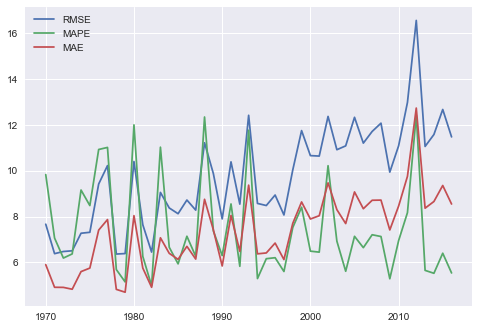

In [55]:
euc_lr_metrics_df[['RMSE', 'MAPE', 'MAE']].plot();

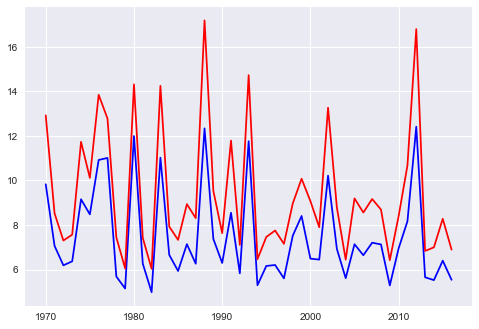

In [59]:
euc_lr_metrics_df['MAPE'].plot(c='b')
lin_reg_metrics_df['MAPE'].plot(c='r');

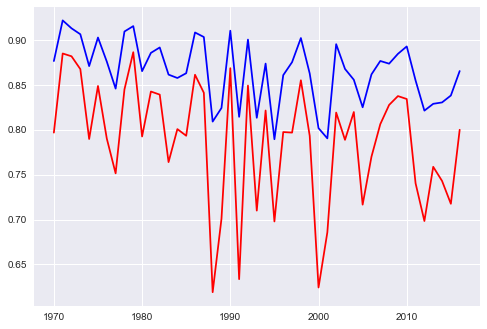

In [58]:
euc_lr_metrics_df['R2'].plot(c='b')
lin_reg_metrics_df['R2'].plot(c='r');

# Weighted LR (Haversine Distance)

In [66]:
full_hav_df = full_spatial.copy()
full_hav_df = np.radians(full_hav_df)
full_hav_df.head()

,latitude,longitude
fips_code,,
01049,0.601437,-1.497564
01077,0.609144,-1.529851
01079,0.602517,-1.523864
01083,0.607551,-1.518112
01089,0.606730,-1.510586


In [67]:
dist = DistanceMetric.get_metric("haversine")
hav_dist_df = pd.DataFrame(dist.pairwise(full_hav_df))

In [69]:
earth_radius = 3958.75 # If we want to know the distances in miles
hav_dist_df.head() * earth_radius

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,109.444591,85.919211,71.169422,47.320760,291.284622,288.746451,291.555032,316.022869,1981.852446,2014.424279,1099.658989,989.293085,649.857307,661.636493,646.184191,230.424030,238.861648,213.704406,264.082467,268.561961,249.277592,230.608220,483.150229,467.358191,520.832339,571.287564,452.513484,413.909768,400.181898,349.839443,358.766970,538.197427,390.168199,376.101867,353.209952,360.778801,444.234107,299.640277,480.372104,265.346806,422.537187,492.597991,504.904054,520.820379,531.317063,448.235679,340.212699,406.860239,...,754.886345,859.963022,788.143057,650.387760,666.056810,625.610028,638.085325,793.053487,766.603826,657.961436,637.981194,603.703290,668.185559,634.363600,731.315185,612.691307,693.210321,573.679554,701.448366,711.591905,612.727462,675.949845,751.012585,674.589709,703.933965,741.616476,702.302039,772.923140,790.966202,836.733447,719.390947,585.381979,664.025393,594.046932,811.231743,810.800654,658.124718,730.739166,650.053229,741.572214,686.085653,586.040146,850.599605,629.120292,606.406332,711.765017,691.690039,726.401295,1132.438362
1,109.444591,0.000000,32.679208,38.653423,63.324545,185.337486,179.691761,183.714180,206.592454,1872.462597,1905.016690,992.543431,882.069019,726.139066,734.100734,725.936940,309.012723,347.882848,291.428383,361.526504,377.210501,317.852531,319.141343,401.286354,388.656861,460.660871,510.280372,378.182192,363.186103,333.073806,274.057763,303.789406,486.862556,337.767854,330.106618,291.916511,293.117321,394.764273,224.916120,409.426530,200.282377,342.679449,443.019129,425.830249,445.952428,465.603946,404.014327,285.214537,325.266434,...,690.031803,796.561608,728.080526,598.559441,602.188112,572.068890,591.007377,729.265941,705.498865,613.238746,574.246079,547.546011,619.307374,575.179217,671.829419,564.209739,637.032419,530.737204,664.311740,648.888735,552.387458,636.991161,699.601527,623.150219,644.489192,700.304534,658.803980,707.397323,723.699784,771.771967,668.742433,542.551561,604.007191,542.219324,753.097097,744.426956,601.652982,685.696383,609.584095,678.724682,624.097806,538.769940,790.143220,585.828438,561.899489,664.795936,642.042117,672.124937,1027.957358
2,85.919211,32.679208,0.000000,27.348330,46.350079,216.440094,208.253057,213.725608,232.965785,1899.061141,1931.503829,1022.208136,911.694008,721.349602,730.792609,719.762595,276.340654,321.127250,258.755652,330.039368,349.864105,285.334054,286.806075,433.604039,420.708131,490.585571,540.424857,409.782927,391.242638,363.651345,305.562344,332.289893,515.446962,365.999732,357.107635,321.427147,323.619842,422.732661,256.071993,440.697694,229.731706,374.767663,471.178802,457.956318,477.712737,496.318400,431.058069,313.599164,357.475051,...,720.908221,827.333967,758.361930,627.451487,632.854121,601.191206,619.092679,760.039607,735.902033,640.954658,604.861329,577.034950,647.747721,605.164543,701.976945,592.483947,666.658858,557.957634,690.734334,679.451410,582.505196,663.705941,728.568277,652.018127,674.601031,727.555444,686.381354,738.370139,754.891086,802.721377,697.547476,569.780542,634.151196,571.009546,783.131600,775.527752,631.275546,713.585181,636.526165,709.335065,654.538416,566.781927,820.527718,613.236899,589.475324,692.984801,670.645839,701.506630,1058.824532
3,71.169422,38.653423,27.348330,0.000000,24.681695,221.034015,217.578432,220.647273,245.105629,1910.716848,1943.301950,1029.183734,918.764219,695.319670,704.401313,694.126018,281.961845,309.975364,264.488919,328.357736,339.542404,294.212737,288.859878,425.679030,411.615216,476.121684,526.270011,399.197863,374.259528,350.730481,295.070315,316.084752,498.889310,349.317190,338.988680,306.751363,310.701714,405.55742

In [78]:
from scipy import sparse

In [80]:
x = X_train[:0].append(X_train[1:])
y = y_train[:0].append(y_train[1:])
w = hav_weights[0][:0].append(hav_weights[0][1:])

In [93]:
n_samples = x.shape[0]
sample_weight = w * np.ones(n_samples)
sample_weight = np.sqrt(sample_weight)
sw_matrix = sparse.dia_matrix((sample_weight, 0),shape=(n_samples, n_samples))

In [95]:
np.array(sw_matrix)

array(<813x813 sparse matrix of type '<class 'numpy.float64'>'
	with 813 stored elements (1 diagonals) in DIAgonal format>, dtype=object)

In [79]:
X.shape

(814, 47)

In [97]:
from sklearn.utils.extmath import safe_sparse_dot

In [98]:
safe_sparse_dot(sw_matrix, x)

array([[  1.6947353 ,   2.8471553 ,   3.48437577, ...,  10.48024308,
         12.50036756,  10.95476897],
       [  2.35409364,   3.53114046,   4.11966387, ...,  13.49680354,
         14.68169734,  11.00931126],
       [  2.76693643,   3.68924857,   3.96594222, ...,  13.35675676,
         15.23491967,  14.32099219],
       ..., 
       [  1.7097253 ,   2.07446669,   2.12005937, ...,   3.2712744 ,
          4.16717045,   3.70212517],
       [  1.69698471,   2.05900811,   1.99112873, ...,   2.22870659,
          3.36229237,   3.25821064],
       [  1.73518003,   2.18212033,   2.47131701, ...,   3.54134469,
          3.93044566,   4.28799791]])

In [99]:
safe_sparse_dot(sw_matrix, x).shape

(813, 46)

In [101]:
safe_sparse_dot(sw_matrix, y).shape

(813,)

In [100]:
x.shape

(813, 46)

In [104]:
safe_sparse_dot(sw_matrix, y)[:5], y[:5], safe_sparse_dot(sw_matrix, y)[-5:]

(array([  7.21957237,   9.19665916,   9.46627645,  15.68037482,   6.87181299]),
 fips_code
 01077    106.5
 01079    117.2
 01083    112.9
 01089    150.7
 05021    172.9
 Name: 2016, dtype: float64,
 array([ 4.27825989,  3.67102291,  3.77051419,  3.5546173 ,  3.87523539]))

In [131]:
weights_813 = np.array(hav_weights[np.arange(1,814)][1:])

In [132]:
weights_813.dot(np.array(x))

array([[  61.90842669,   76.30339539,   84.92603473, ...,  159.41473576,
         168.27474595,  160.48720519],
       [  61.62069867,   75.8932004 ,   84.46994199, ...,  158.52177669,
         167.54962422,  160.16944028],
       [  61.08184747,   75.49102414,   84.22260291, ...,  158.9795695 ,
         167.54534163,  159.76865624],
       ..., 
       [  74.52202357,   88.16570276,   93.85273216, ...,  155.30268969,
         165.4986019 ,  165.13638278],
       [  75.14909236,   87.68748413,   93.84542989, ...,  154.66591131,
         165.09526252,  166.08346667],
       [  72.19342524,   82.35299302,   92.51831414, ...,  155.28512608,
         166.48671531,  166.26164179]])

In [134]:
safe_sparse_dot(sw_matrix, x)[0]

array([  1.6947353 ,   2.8471553 ,   3.48437577,   3.76231236,
         2.71157648,   3.3894706 ,   3.3894706 ,   2.44041883,
         4.50121695,   3.49793366,   2.7319133 ,   5.19944789,
         5.38247931,   3.52504942,   4.74525883,   5.75532107,
         4.74525883,   5.28079519,   2.33873471,   5.37570037,
         2.43363989,   3.69452295,   7.05009884,   3.70808083,
         6.52134143,   6.43999413,   5.42315295,   5.15199531,
         4.13515413,   6.77894119,   6.43999413,   8.67704473,
         6.71115178,   9.82946473,   9.15157061,   7.59241414,
         5.6943106 ,   6.2366259 ,   6.71115178,   8.81262355,
         8.57536061,   8.46011861,   5.13165848,  10.48024308,
        12.50036756,  10.95476897])

In [138]:
weights_813.dot(np.array(x))[0]

array([  61.90842669,   76.30339539,   84.92603473,   80.31625904,
         67.36963152,   76.44457924,   83.31494582,   79.85985373,
         88.61561142,   98.08847408,   74.20765817,   97.29977621,
        103.9501904 ,   67.43583293,   99.10280757,  108.42394867,
        102.81229179,  106.1546055 ,   74.20271927,  108.37857112,
        102.36780435,   96.43959321,  124.34587448,   93.93007157,
        126.1762082 ,  107.36659156,  115.99558526,  112.44817467,
        114.71122288,  116.45837154,  127.67069876,  133.07738865,
        111.01042242,  133.51852855,  149.67667579,  135.46074265,
        135.87397323,  131.89990102,  135.60322035,  153.56687607,
        137.85352107,  135.73691397,  106.18839849,  159.41473576,
        168.27474595,  160.48720519])

In [141]:
safe_sparse_dot(sw_matrix, x)[-1]

array([ 1.73518003,  2.18212033,  2.47131701,  2.31094431,  2.06644167,
        2.23733061,  2.44765546,  2.47131701,  2.35300928,  2.36089646,
        2.7053034 ,  2.97872571,  2.87093422,  2.90511201,  2.77102992,
        2.62906064,  3.14698559,  3.09440438,  3.43881132,  2.54755976,
        3.36519762,  3.31261641,  2.65535125,  2.15582973,  3.42829508,
        2.81309489,  3.44406944,  3.6543943 ,  3.54923187,  3.20745399,
        3.60181308,  3.44406944,  3.12858217,  3.52294126,  3.52294126,
        3.86471915,  3.49665066,  3.36519762,  3.49665066,  3.81213793,
        3.43881132,  3.63861993,  3.84894478,  3.54134469,  3.93044566,
        4.28799791])

In [140]:
weights_813.dot(np.array(x))[-1]

array([  72.19342524,   82.35299302,   92.51831414,   86.67615547,
         68.78068828,   78.62849672,   79.14667808,   88.06970613,
         97.32966394,  104.69944767,   85.15426915,  106.71377134,
        106.91461229,   80.76935674,  103.88980738,  113.89092972,
        115.77628201,  115.85352853,   87.48209016,  110.14146163,
        113.85386517,  107.77447124,  123.31608914,   91.69317826,
        131.77602953,  107.70400077,  123.38737278,  122.0599868 ,
        129.23829839,  127.34697027,  131.30624521,  134.08054612,
        123.09666367,  135.46271059,  152.11241755,  144.43765712,
        142.10267918,  143.58648476,  146.81889118,  160.97283202,
        149.06809758,  143.30652086,  123.04186274,  155.28512608,
        166.48671531,  166.26164179])

In [143]:
X_train = X.copy()
y_train = X_train.pop("2016")
hav_weights = hav_dist_df.copy()
hav_weights = hav_weights.applymap(lambda x: x**-1 if x != 0 else 0)
hav_weights = hav_weights.apply(lambda x: x/sum(x), axis=1) # normalize
hav_preds = []

for i in range(X.shape[0]):
    x = X_train[:i].append(X_train[i+1:])
    y = y_train[:i].append(y_train[i+1:])
    w = hav_weights[i][:i].append(hav_weights[i][i+1:])
    lm = LinearRegression()
    lm.fit(x, y, w)
    y_pred = lm.predict(X_train[i:i+1])
    hav_preds.append(y_pred[0])

In [73]:
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, hav_preds))))
print("R2: {:.4f}".format(r2_score(y_train, hav_preds)))

RMSE: 11.4605
R2: 0.8653


In [74]:
hav_preds[:5]

[127.1856574703657,
 141.23595248244257,
 118.76432700947991,
 141.6132631584729,
 146.15699309843674]

# If normalizing the weights prior to passing to LR

In [144]:
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, hav_preds))))
print("R2: {:.4f}".format(r2_score(y_train, hav_preds)))

RMSE: 11.5667
R2: 0.8628


In [145]:
hav_preds[:5]

[125.00724729040657,
 140.62850387398251,
 117.29552258587755,
 141.27471848363385,
 146.24438397158463]

In [146]:
hav_lr_years = {}
hav_weights = hav_dist_df.copy()
hav_weights = hav_weights.applymap(lambda x: x**-1 if x != 0 else 0)
hav_weights = hav_weights.apply(lambda x: x/sum(x), axis=1) # normalize

for year in X.columns.values:
    
    X_train = X.copy()
    y_train = X_train.pop(year)
    hav_preds = []

    for i in range(X.shape[0]):
        x = X_train[:i].append(X_train[i+1:])
        y = y_train[:i].append(y_train[i+1:])
        w = hav_weights[i][:i].append(hav_weights[i][i+1:])
        lm = LinearRegression()
        lm.fit(x, y, w)
        y_pred = lm.predict(X_train[i:i+1])
        hav_preds.append(y_pred[0])
        
    hav_lr_years[year] = hav_preds

In [147]:
hav_lr_preds_df = pd.DataFrame(hav_lr_years)
hav_lr_preds_df.index = full_data.index

hav_lr_preds_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,27.799793,52.653166,67.156053,55.517722,48.243241,53.739324,85.598020,29.036442,58.549275,66.783325,23.322095,59.111903,81.022932,49.721622,77.808439,90.151592,55.015760,64.644266,53.115857,85.999784,68.814349,78.931728,109.419267,54.009347,99.116044,84.568822,98.676783,91.168447,61.717513,91.312360,79.459584,109.437333,62.992963,125.469705,120.205388,128.278720,77.129232,64.558679,99.273039,113.781052,108.825503,99.775550,84.792709,129.986855,162.596515,148.957180,125.007247
01077,38.797368,43.744009,46.661230,52.550571,43.217804,39.984778,68.205154,41.846970,46.079406,67.834649,34.285082,54.945744,80.360375,37.396526,68.779234,83.506910,74.667624,54.979323,48.958796,85.727060,53.366030,75.760201,102.905193,68.108153,97.145548,87.050693,82.671103,83.907511,62.196786,107.370215,94.537276,127.608307,93.552550,133.590288,139.560646,125.911600,81.977499,95.687144,109.406270,120.483072,135.249490,105.560491,63.112720,152.808314,158.362374,146.850242,140.628504
01079,23.513863,43.131269,52.527293,45.224434,34.950209,40.806944,49.704254,20.026500,54.457219,58.273025,22.410342,52.955106,71.878846,60.632136,64.302917,88.996306,63.335744,79.998973,28.351167,80.937932,48.872863,75.136468,96.715047,78.323056,103.929307,114.380123,84.454989,86.123561,79.794811,112.914210,88.707317,133.932918,127.394345,133.158736,148.019382,139.901316,83.347207,98.387386,106.041981,123.736259,116.668023,117.867613,68.821561,160.732712,181.566746,166.894559,117.295523
01083,22.839291,36.673811,56.003464,51.416697,45.658370,52.372865,69.740422,38.521707,54.684849,64.221732,33.457657,71.898092,82.958146,47.366660,79.046187,82.836844,67.121629,85.501573,47.486179,75.919886,49.300127,72.895863,112.506883,64.654316,115.253476,92.117022,86.423932,86.730505,88.852836,118.209619,103.569564,115.220430,96.688683,142.556663,151.504604,122.431248,89.854212,84.947029,98.640439,137.291264,135.354361,138.208589,99.582680,162.263925,187.971991,157.297743,141.274718
01089,27.815629,51.143178,66.294859,58.647204,54.042583,58.970235,63.573945,33.443425,63.664274,77.180115,33.589999,75.766542,83.900125,59.710717,80.794332,91.807751,49.074694,73.800419,36.107513,88.914299,66.852668,77.364625,108.756781,69.978856,107.401630,86.900885,97.070101,91.068914,70.002722,108.021868,97.713009,132.152297,101.029855,142.970538,138.798244,130.696285,107.627037,98.605788,108.646877,121.712326,130.261082,144.648649,131.030027,163.506464,169.294058,154.494477,146.244384


In [148]:
hav_lr_preds_df.to_csv("lin_reg_haversine_norm_preds.csv")

In [178]:
hav_lr_RMSE = np.sqrt(mean_squared_error(X, hav_lr_preds_df))
hav_lr_R2 = r2_score(X, hav_lr_preds_df)
hav_lr_MAPE = mape(X, hav_lr_preds_df)
hav_lr_MAE = mean_absolute_error(X, hav_lr_preds_df)

print("Haversine Distance Normalized weighted Linear Regression RMSE: {:.4f}".format(hav_lr_RMSE))
print("Haversine Distance Normalized weighted Linear Regression R2: {:.4f}".format(hav_lr_R2))
print("Haversine Distance Normalized weighted Linear Regression MAPE: {:.4f}".format(hav_lr_MAPE))
print("Haversine Distance Normalized weighted Linear Regression MAE: {:.4f}".format(hav_lr_MAE))

Haversine Distance Normalized weighted Linear Regression RMSE: 10.0148
Haversine Distance Normalized weighted Linear Regression R2: 0.8642
Haversine Distance Normalized weighted Linear Regression MAPE: 7.4938
Haversine Distance Normalized weighted Linear Regression MAE: 7.3827


# By year

In [181]:
hav_lr_r2 = {}
hav_lr_rmse = {}
hav_lr_mape = {}
hav_lr_mae = {}

for i in hav_lr_preds_df.columns:
    hav_lr_rmse[i] = np.sqrt(mean_squared_error(X[i], hav_lr_preds_df[i]))
    hav_lr_r2[i] = r2_score(X[i], hav_lr_preds_df[i])
    hav_lr_mape[i] = mape(X[i], hav_lr_preds_df[i])
    hav_lr_mae[i] = mean_absolute_error(X[i], hav_lr_preds_df[i])

hav_lr_metrics_df = pd.DataFrame({"RMSE": hav_lr_rmse, "R2": hav_lr_r2,
                                  "MAPE": hav_lr_mape, "MAE": hav_lr_mae})
hav_lr_metrics_df.head()

,MAE,MAPE,R2,RMSE
1970,5.902787,9.840422,0.876889,7.644885
1971,4.942830,7.073527,0.920865,6.405256
1972,4.943739,6.231041,0.910413,6.558422
1973,4.840980,6.359047,0.906443,6.492870
1974,5.558692,9.043413,0.872636,7.214771


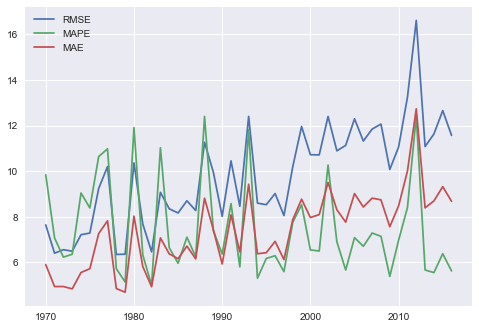

In [151]:
hav_lr_metrics_df[['RMSE', 'MAPE', 'MAE']].plot();

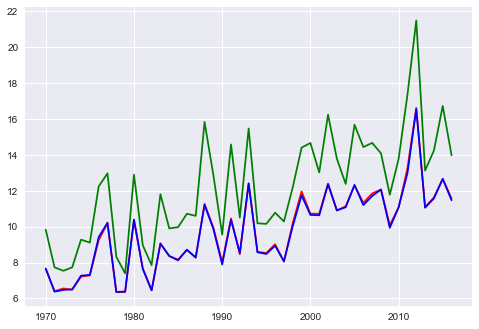

In [152]:
hav_lr_metrics_df['RMSE'].plot(c='r')
euc_lr_metrics_df['RMSE'].plot(c='b')
lin_reg_metrics_df['RMSE'].plot(c='g');

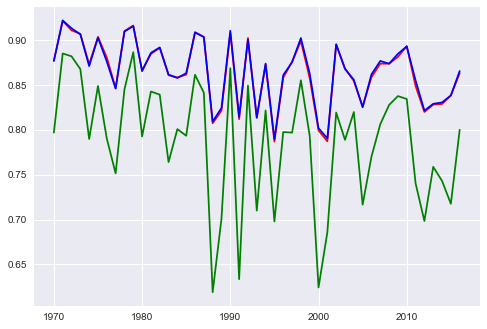

In [153]:
hav_lr_metrics_df['R2'].plot(c='r')
euc_lr_metrics_df['R2'].plot(c='b')
lin_reg_metrics_df['R2'].plot(c='g');

# Below are results for Haversine and Euclidean distances (both not normalized)
### Nearly identical, whereas the normalized (Haversine) compared to Euclidean above show a noticable difference

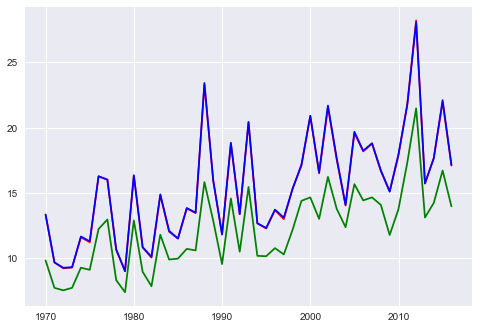

In [283]:
hav_lr_metrics_df['RMSE'].plot(c='r')
euc_lr_metrics_df['RMSE'].plot(c='b')
lin_reg_metrics_df['RMSE'].plot(c='g');

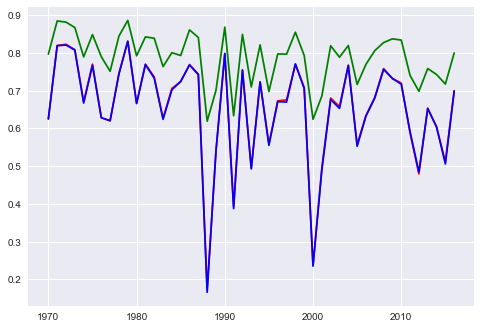

In [284]:
hav_lr_metrics_df['R2'].plot(c='r')
euc_lr_metrics_df['R2'].plot(c='b')
lin_reg_metrics_df['R2'].plot(c='g');

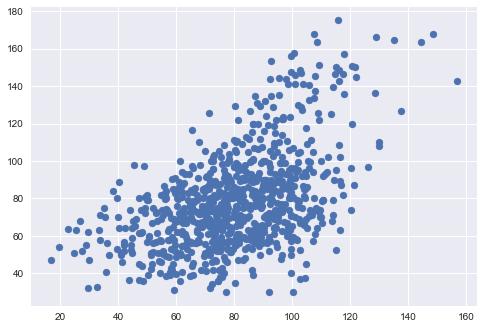

In [285]:
plt.scatter(hav_lr_preds_df['1988'], X['1988']); # overpredicting 

# Weighting by Distances (Exponential Smoothing)

In [ ]:
hav_norm = hav_dist_df.copy()
hav_norm = hav_norm.applymap(lambda x: 1/x**6 if x != 0 else 0)
hav_norm = hav_norm.apply(lambda x: x/sum(x), axis=1)


In [172]:
X_train = X.copy()
y_train = X_train.pop("2016")
hav_weights = hav_dist_df.copy()
hav_weights = hav_weights.applymap(lambda x: x**-2 if x != 0 else 0)
# hav_weights = hav_weights.apply(lambda x: x/sum(x), axis=1) # normalize
hav_preds2 = []

for i in range(X.shape[0]):
    x = X_train[:i].append(X_train[i+1:])
    y = y_train[:i].append(y_train[i+1:])
    w = hav_weights[i][:i].append(hav_weights[i][i+1:])
    lm = LinearRegression()
    lm.fit(x, y, w)
    y_pred = lm.predict(X_train[i:i+1])
    hav_preds2.append(y_pred[0])

In [173]:
# not normalized
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, hav_preds2))))
print("R2: {:.4f}".format(r2_score(y_train, hav_preds2)))

RMSE: 11.8738
R2: 0.8554


In [171]:
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, hav_preds2))))
print("R2: {:.4f}".format(r2_score(y_train, hav_preds2)))

RMSE: 12.0641
R2: 0.8507


In [174]:
hav_lr_years2 = {}
hav_weights2 = hav_dist_df.copy()
hav_weights2 = hav_weights.applymap(lambda x: x**-2 if x != 0 else 0)
hav_weights2 = hav_weights.apply(lambda x: x/sum(x), axis=1) # normalize

for year in X.columns.values:
    
    X_train = X.copy()
    y_train = X_train.pop(year)
    hav_preds = []

    for i in range(X.shape[0]):
        x = X_train[:i].append(X_train[i+1:])
        y = y_train[:i].append(y_train[i+1:])
        w = hav_weights[i][:i].append(hav_weights[i][i+1:])
        lm = LinearRegression()
        lm.fit(x, y, w)
        y_pred = lm.predict(X_train[i:i+1])
        hav_preds.append(y_pred[0])
        
    hav_lr_years2[year] = hav_preds

In [190]:
hav_lr_preds_df2 = pd.DataFrame(hav_lr_years2)
hav_lr_preds_df2.index = full_data.index

hav_lr_preds_df2.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,27.783336,49.557924,68.637939,55.651948,49.012444,53.797166,90.377669,36.049820,54.766590,65.911318,21.428430,58.629002,82.520004,51.152397,71.513103,88.612312,58.024767,55.253433,50.850703,86.755437,68.706871,84.153969,115.327380,46.472768,103.402552,83.415767,93.794232,89.476322,61.576778,94.226035,84.954528,113.023913,65.496112,121.111170,126.158090,137.383121,84.385160,62.057596,105.332714,109.549837,113.907156,98.657708,83.460867,123.312449,158.989484,154.352171,129.986310
01077,40.789629,45.278183,43.335836,54.255294,43.300042,37.432352,67.152414,43.345813,46.663434,64.145583,41.893292,53.646067,78.290741,36.399959,67.451242,82.994111,74.217274,47.889929,47.233311,87.776475,50.936015,72.261620,107.069668,69.466700,89.519725,84.091796,82.744228,86.978874,52.651237,114.509855,88.612626,134.161700,95.079654,138.234949,138.020694,128.561928,82.485401,99.150785,121.826165,124.025812,138.687679,111.220960,55.919722,144.300655,170.800738,146.388387,132.882900
01079,21.788155,37.426878,57.949050,44.453362,34.376453,48.550331,43.555530,18.991312,60.385567,58.463225,22.818832,57.237031,69.367260,68.175612,64.052205,90.894162,60.790942,89.625649,20.672222,80.488531,47.276336,64.186139,98.125216,75.511198,104.113778,119.601107,88.711117,83.597813,84.887672,111.485985,85.749380,141.408041,127.758587,134.679764,148.895988,135.832124,75.625976,91.927459,89.508707,127.250762,111.553869,130.627463,75.086854,160.677387,192.507079,166.083283,112.890913
01083,20.197448,36.275512,54.523745,52.350303,41.414327,59.179197,68.020893,34.209241,57.719439,56.833346,36.045611,81.979541,87.283405,50.065487,85.276518,83.259724,62.184222,94.915052,41.405183,69.721425,41.973484,75.805349,115.606706,53.385165,114.938020,91.883632,85.497694,84.054281,96.410245,113.430636,100.555059,117.710690,97.550855,147.852177,146.043546,120.848663,85.258621,77.403106,93.049024,137.527320,127.987357,142.134951,100.602053,160.924406,199.322213,167.527894,133.839645
01089,27.735365,52.397340,66.454261,56.161688,53.785131,57.106461,65.936662,32.587779,71.138678,80.562823,30.971487,79.516267,80.622455,66.642704,79.449586,94.224335,49.220458,72.301373,36.222432,91.493443,67.977527,78.734273,108.914489,67.833472,108.222650,87.892758,98.607497,89.085878,65.372862,106.944407,96.400596,132.639732,105.570978,140.074826,140.184807,133.814131,98.795766,105.014678,104.623206,118.390246,132.219508,143.875695,126.504216,168.711681,169.899230,152.867752,138.436504


In [191]:
hav_lr_preds_df2.to_csv("lin_reg_hav_norm_exp2_df.csv")

In [179]:
hav_lr2_RMSE = np.sqrt(mean_squared_error(X, hav_lr_preds_df2))
hav_lr2_R2 = r2_score(X, hav_lr_preds_df2)
hav_lr2_MAPE = mape(X, hav_lr_preds_df2)
hav_lr2_MAE = mean_absolute_error(X, hav_lr_preds_df2)

print("Haversine Distance (1/x^2) Normalized weighted Linear Regression RMSE: {:.4f}".format(hav_lr2_RMSE))
print("Haversine Distance (1/x^2) Normalized weighted Linear Regression R2: {:.4f}".format(hav_lr2_R2))
print("Haversine Distance (1/x^2) Normalized weighted Linear Regression MAPE: {:.4f}".format(hav_lr2_MAPE))
print("Haversine Distance (1/x^2) Normalized weighted Linear Regression MAE: {:.4f}".format(hav_lr2_MAE))

Haversine Distance (1/x^2) Normalized weighted Linear Regression RMSE: 9.9481
Haversine Distance (1/x^2) Normalized weighted Linear Regression R2: 0.8657
Haversine Distance (1/x^2) Normalized weighted Linear Regression MAPE: 7.5478
Haversine Distance (1/x^2) Normalized weighted Linear Regression MAE: 7.2608


In [182]:
hav_lr2_r2 = {}
hav_lr2_rmse = {}
hav_lr2_mape = {}
hav_lr2_mae = {}

for i in hav_lr_preds_df.columns:
    hav_lr2_rmse[i] = np.sqrt(mean_squared_error(X[i], hav_lr_preds_df2[i]))
    hav_lr2_r2[i] = r2_score(X[i], hav_lr_preds_df2[i])
    hav_lr2_mape[i] = mape(X[i], hav_lr_preds_df2[i])
    hav_lr2_mae[i] = mean_absolute_error(X[i], hav_lr_preds_df2[i])

hav_lr2_metrics_df = pd.DataFrame({"RMSE": hav_lr2_rmse, "R2": hav_lr2_r2,
                                  "MAPE": hav_lr2_mape, "MAE": hav_lr2_mae})
hav_lr2_metrics_df.head()

,MAE,MAPE,R2,RMSE
1970,5.745954,9.900182,0.879611,7.559882
1971,4.879292,7.104659,0.920969,6.401025
1972,4.989867,6.319604,0.906839,6.687962
1973,4.869089,6.487954,0.902854,6.616233
1974,5.342790,8.997557,0.880874,6.977551


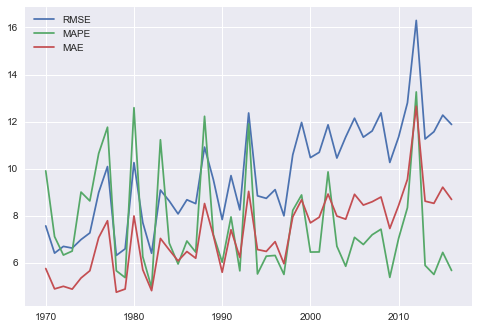

In [183]:
hav_lr2_metrics_df[['RMSE', 'MAPE', 'MAE']].plot();

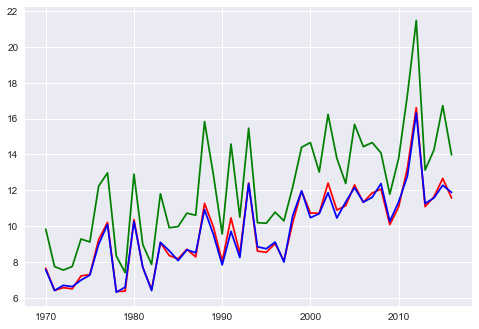

In [186]:
hav_lr_metrics_df['RMSE'].plot(c='r')
hav_lr2_metrics_df['RMSE'].plot(c='b')
# euc_lr_metrics_df['RMSE'].plot(c='y')
lin_reg_metrics_df['RMSE'].plot(c='g');

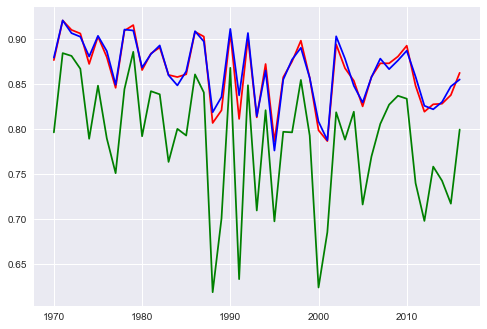

In [189]:
hav_lr_metrics_df['R2'].plot(c='r')
hav_lr2_metrics_df['R2'].plot(c='b')
# euc_lr_metrics_df['R2'].plot(c='y')
lin_reg_metrics_df['R2'].plot(c='g');

In [439]:
euc_norm = euc_dist_df.copy()
euc_norm = euc_norm.applymap(lambda x: 1/x**10 if x != 0 else 0)
euc_norm = euc_norm.apply(lambda x: x/sum(x), axis=1)
euc_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000e+00,1.397649e-09,1.446015e-07,0.000009,4.062470e-02,5.787949e-18,5.196521e-18,4.876270e-18,7.514913e-19,4.574019e-35,3.341714e-35,7.956927e-30,7.216212e-29,5.240977e-25,4.123362e-25,5.271553e-25,1.145952e-14,3.759490e-16,5.468894e-14,2.360982e-16,4.096881e-17,3.159439e-15,6.909908e-15,9.552825e-22,2.219262e-21,6.286444e-22,9.573946e-23,5.331076e-21,8.530562e-20,8.693626e-20,8.249911e-19,1.228760e-18,4.605402e-22,2.583394e-19,6.528033e-19,1.309282e-18,6.572512e-19,2.198780e-20,1.832266e-17,1.916835e-21,2.997831e-16,1.570454e-20,2.831671e-21,4.599745e-22,3.097079e-22,3.293131e-22,2.152144e-20,3.481646e-18,3.045732e-20,...,2.911103e-25,2.218076e-26,1.546913e-25,1.040325e-23,3.847668e-24,2.120137e-23,1.787898e-23,1.130524e-25,2.575700e-25,1.040578e-23,9.218545e-24,3.900193e-23,6.728564e-24,1.274123e-23,7.205871e-25,3.840848e-23,2.446672e-24,1.670144e-22,3.480803e-24,1.072884e-24,2.427278e-23,7.016680e-24,5.939361e-25,5.084685e-24,1.557154e-24,1.048040e-24,2.934247e-24,1.739385e-25,9.891732e-26,3.563642e-26,1.446133e-24,1.121225e-22,4.906197e-24,6.343564e-23,9.457558e-26,6.269769e-26,6.847385e-24,1.272210e-24,1.477041e-23,4.625603e-25,2.319315e-24,9.671673e-23,3.232573e-26,2.642218e-23,5.314511e-23,2.028134e-24,3.286025e-24,1.035485e-24,4.830405e-30
1,4.249119e-14,0.000000e+00,1.074728e-02,0.000038,1.934703e-09,2.016783e-18,2.126409e-18,1.769174e-18,1.042140e-19,4.111346e-39,2.949183e-39,1.855705e-33,2.161539e-32,1.188034e-30,1.032117e-30,1.120337e-30,3.794827e-22,5.355006e-24,1.213340e-21,7.179436e-24,1.175191e-24,3.226765e-22,1.303383e-22,2.358401e-24,5.586449e-24,4.011550e-25,4.853974e-26,1.257382e-23,6.035803e-23,2.359624e-22,8.804797e-21,2.094942e-21,1.623527e-25,2.553188e-22,4.236427e-22,4.158229e-21,3.153799e-21,1.142154e-23,5.403860e-19,2.915308e-24,8.088497e-18,6.998772e-23,1.118602e-24,8.275137e-25,4.094373e-25,2.636927e-25,7.436096e-24,7.485832e-21,1.841794e-22,...,8.554277e-29,4.762875e-30,3.526961e-29,2.473379e-27,1.468415e-27,5.939826e-27,3.486628e-27,2.884235e-29,6.437888e-29,1.708280e-27,3.910099e-27,1.348154e-26,1.319258e-27,4.504035e-27,1.871152e-28,8.696117e-27,6.215201e-28,3.152874e-26,3.574408e-28,3.339835e-28,9.863997e-27,8.269850e-28,1.062285e-28,1.104965e-27,4.379649e-28,1.225352e-28,4.098642e-28,4.958156e-29,2.828531e-29,8.451291e-30,2.696376e-28,2.028774e-26,1.612239e-27,1.826140e-26,1.909642e-29,1.654381e-29,1.968631e-27,1.800885e-28,1.986469e-27,1.319428e-28,7.646755e-28,2.240844e-26,6.471624e-30,4.337111e-27,9.918444e-27,3.264540e-28,6.278014e-28,2.214252e-28,1.047332e-33
2,1.741823e-11,4.258228e-02,0.000000e+00,0.957302,5.864330e-06,4.469526e-19,5.692806e-19,4.349174e-19,4.588961e-20,1.301261e-38,9.381596e-39,4.454796e-33,4.853409e-32,6.360763e-30,5.357500e-30,6.157278e-30,1.429990e-20,9.797700e-23,5.275999e-20,1.677210e-22,1.965452e-23,1.169598e-20,4.270417e-21,1.932051e-24,4.338412e-24,4.226675e-25,5.741047e-26,9.391176e-24,5.133484e-23,1.478270e-22,3.614675e-21,1.288394e-21,1.956169e-25,1.917422e-22,3.399575e-22,2.190325e-21,1.563647e-21,1.100011e-23,1.420054e-19,2.481135e-24,1.819689e-18,4.403175e-23,1.234923e-24,7.382855e-25,3.902151e-25,2.729472e-25,7.886527e-24,4.146203e-21,1.055131e-22,...,1.351208e-28,8.499815e-30,5.910638e-29,3.645341e-27,2.045906e-27,8.292262e-27,5.267253e-27,4.790142e-29,1.047332e-28,2.716493e-27,5.192865e-27,1.770879e-26,2.046743e-27,6.112153e-27,2.934870e-28,1.245202e-26,9.439831e-28,4.494287e-26,6.467461e-28,5.018815e-28,1.276571e-26,1.426729e-27,1.792805e-28,1.692751e-27,6.619807e-28,2.220253e-28,6.972935e-28,7.993475e-29,4.637534e-29,1.466931e-29,4.408337e-28,2.953629e-26,2.287009e-27,2.449713e-26,3.310127e-29,2.781735e-29,2.8

In [440]:
ones = np.ones(euc_norm.shape[0])
norms = [sum(testing[i]) for i in euc_norm.columns.values]
assert(np.allclose(ones, norms))

In [441]:
test = np.array(euc_norm).dot(np.array(X))
test

array([[  44.50026915,   66.85839055,   88.17254823, ...,  192.78024863,
         175.93528055,  125.34825336],
       [  43.84880851,   44.01054756,   57.94017172, ...,  189.07772355,
         175.41792602,  149.64645813],
       [  32.66021157,   43.91465947,   47.47547929, ...,  181.8151666 ,
         170.40841992,  112.632182  ],
       ..., 
       [  68.90086167,   88.63150029,   84.14616317, ...,  145.9664763 ,
         133.80957898,  154.31044056],
       [  74.82006133,   90.66665685,   85.22431957, ...,  137.67048287,
         144.35694336,  157.15668401],
       [  99.69996427,   92.39994313,  100.39993398, ...,  177.49992182,
         165.29992442,  161.60002205]])

In [442]:
test_r2 = {}
test_rmse = {}

for i, col in enumerate(hav_lr_preds_df.columns):
    test_rmse[col] = np.sqrt(mean_squared_error(X[col], test.T[i]))
    test_r2[col] = r2_score(X[col], test.T[i])

test_metrics_df = pd.DataFrame({"RMSE": test_rmse, "R2": test_r2})
test_metrics_df.head()

,R2,RMSE
1970,0.766568,10.526941
1971,0.811891,9.875452
1972,0.781880,10.233483
1973,0.809735,9.259302
1974,0.728213,10.539358


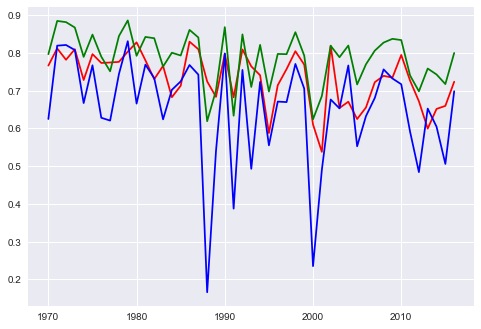

In [443]:
test_metrics_df['R2'].plot(c='r')
euc_lr_metrics_df['R2'].plot(c='b')
lin_reg_metrics_df['R2'].plot(c='g');

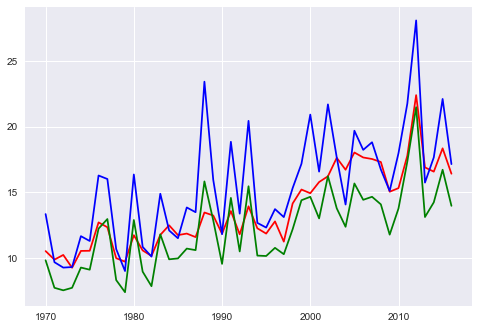

In [444]:
test_metrics_df['RMSE'].plot(c='r')
euc_lr_metrics_df['RMSE'].plot(c='b')
lin_reg_metrics_df['RMSE'].plot(c='g');

# Weighting by Haversine Distances (Exponential Smoothing Dot Product)

In [433]:
hav_norm = hav_dist_df.copy()
hav_norm = hav_norm.applymap(lambda x: 1/x**8 if x != 0 else 0)
hav_norm = hav_norm.apply(lambda x: x/sum(x), axis=1)
hav_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,0.000460,0.003188,0.014385,0.376566,1.826900e-07,1.959395e-07,1.813389e-07,9.517157e-08,3.978183e-14,3.491787e-14,4.427832e-12,1.031943e-11,2.976537e-10,2.578100e-10,3.114617e-10,1.191333e-06,8.934782e-07,2.176444e-06,4.002569e-07,3.498641e-07,6.350229e-07,1.183742e-06,3.188584e-09,4.159647e-09,1.748525e-09,8.344824e-10,5.385216e-09,1.099031e-08,1.439447e-08,4.219929e-08,3.449496e-08,1.345000e-09,1.762952e-08,2.364893e-08,3.908336e-08,3.298582e-08,6.242523e-09,1.456981e-07,3.339128e-09,3.852516e-07,9.318282e-09,2.730953e-09,2.241736e-09,1.748846e-09,1.490820e-09,5.810372e-09,5.275349e-08,1.260937e-08,...,8.978479e-11,3.165316e-11,6.359382e-11,2.957171e-10,2.444360e-10,4.034834e-10,3.445286e-10,6.051116e-11,7.937568e-11,2.695577e-10,3.449787e-10,5.366202e-10,2.382751e-10,3.610350e-10,1.157227e-10,4.767839e-10,1.775559e-10,8.070498e-10,1.615436e-10,1.440149e-10,4.765589e-10,2.172399e-10,9.355729e-11,2.207688e-10,1.570363e-10,1.034714e-10,1.599793e-10,7.433012e-11,6.180049e-11,3.940563e-11,1.319883e-10,6.866581e-10,2.504828e-10,6.105051e-10,5.047727e-11,5.069237e-11,2.690232e-10,1.164545e-10,2.969368e-10,1.035208e-10,1.928540e-10,6.805129e-10,3.455047e-11,3.858209e-10,5.177803e-10,1.437349e-10,1.807021e-10,1.221357e-10,3.500570e-12
1,0.000009,0.000000,0.139381,0.036381,0.000701,1.302173e-07,1.667821e-07,1.397119e-07,5.463353e-08,1.199692e-15,1.045164e-15,1.924770e-13,4.947142e-13,2.345398e-12,2.149461e-12,2.350627e-12,2.180540e-09,8.451052e-10,3.484337e-09,6.212319e-10,4.422875e-10,1.740081e-09,1.684653e-09,2.696123e-10,3.482124e-10,8.939728e-11,3.943701e-11,4.332777e-10,5.988818e-10,1.196881e-09,5.696892e-09,2.499159e-09,5.742803e-11,1.070110e-09,1.285704e-09,3.437998e-09,3.326925e-09,3.073776e-10,2.768281e-08,2.295974e-10,7.002176e-08,9.533896e-10,1.221786e-10,1.676806e-10,1.158955e-10,8.208082e-11,2.553882e-10,4.140012e-09,1.446975e-09,...,3.527135e-12,1.118459e-12,2.295829e-12,1.100314e-11,1.048377e-11,1.580477e-11,1.217956e-11,2.266144e-12,2.953958e-12,9.064382e-12,1.533171e-11,2.243933e-11,8.377701e-12,1.513385e-11,4.368202e-12,1.765429e-11,6.684711e-12,2.879643e-11,4.779687e-12,5.767837e-12,2.091339e-11,6.688175e-12,3.159140e-12,7.973204e-12,6.090456e-12,3.133858e-12,5.108874e-12,2.891130e-12,2.409391e-12,1.440333e-12,4.532145e-12,2.414609e-11,1.023383e-11,2.426470e-11,1.752133e-12,1.922198e-12,1.055860e-11,3.709540e-12,9.508366e-12,4.025555e-12,7.876869e-12,2.553572e-11,1.193241e-12,1.306807e-11,1.824340e-11,4.751908e-12,6.278657e-12,4.352861e-12,1.454032e-13
2,0.000083,0.188686,0.000000,0.784269,0.011521,5.095767e-08,6.937136e-08,5.637140e-08,2.828617e-08,1.450774e-15,1.266913e-15,2.058717e-13,5.141839e-13,3.347688e-12,3.016881e-12,3.407196e-12,7.216939e-09,2.170171e-09,1.221216e-08,1.743353e-09,1.093242e-09,5.585762e-09,5.360491e-09,1.964105e-10,2.500714e-10,7.314643e-11,3.373097e-11,3.086600e-10,4.470354e-10,8.024717e-10,3.229332e-09,1.651103e-09,4.925376e-11,7.621934e-10,9.279364e-10,2.154026e-09,2.040000e-09,2.406495e-10,1.327439e-08,1.724984e-10,3.163325e-08,6.306878e-10,1.010242e-10,1.268583e-10,9.048503e-11,6.665432e-11,2.058852e-10,2.623688e-09,9.203339e-10,...,3.364120e-12,1.118058e-12,2.243361e-12,1.021575e-11,9.538551e-12,1.438170e-11,1.137276e-11,2.204050e-12,2.853325e-12,8.615745e-12,1.369824e-11,1.996615e-11,7.918887e-12,1.364343e-11,4.162253e-12,1.616213e-11,6.290455e-12,2.612772e-11,4.736123e-12,5.403113e-12,1.851454e-11,6.517870e-12,3.091358e-12,7.513356e-12,5.721835e-12,3.125954e-12,4.981814e-12,2.777911e-12,2.327217e-12,1.423615e-12,4.378457e-12,2.209278e-11,9.383585e-12,2.171523e-11,1.734736e-12,1.875567e-12,9.731047e-12,3.650436e-12,9.107123e-12,3.829128e-12

In [434]:
ones = np.ones(hav_norm.shape[0])
norms = [sum(testing[i]) for i in hav_norm.columns.values]
assert(np.allclose(ones, norms))

In [435]:
test = np.array(hav_norm).dot(np.array(X))
test

array([[  40.9082547 ,   58.81150755,   75.78160693, ...,  183.74488261,
         175.3666834 ,  140.15290224],
       [  41.37576571,   43.97940163,   56.58329474, ...,  188.10984341,
         170.36218556,  144.38791957],
       [  31.5836705 ,   43.65852357,   48.27757239, ...,  182.04902806,
         169.07553605,  112.78387965],
       ..., 
       [  68.78387327,   90.09868655,   86.96467149, ...,  149.85236348,
         145.16734867,  159.73846226],
       [  68.5978351 ,   88.26908122,   85.43548763, ...,  148.60581107,
         147.34388322,  160.42319766],
       [  99.60725807,   92.25007754,  100.22752996, ...,  177.3142617 ,
         165.12817435,  161.69194848]])

In [436]:
test_r2 = {}
test_rmse = {}

for i, col in enumerate(hav_lr_preds_df.columns):
    test_rmse[col] = np.sqrt(mean_squared_error(X[col], test.T[i]))
    test_r2[col] = r2_score(X[col], test.T[i])

test_metrics_df = pd.DataFrame({"RMSE": test_rmse, "R2": test_r2})
test_metrics_df.head()

,R2,RMSE
1970,0.828221,9.030404
1971,0.860993,8.489277
1972,0.831922,8.983216
1973,0.850160,8.216981
1974,0.802939,8.974292


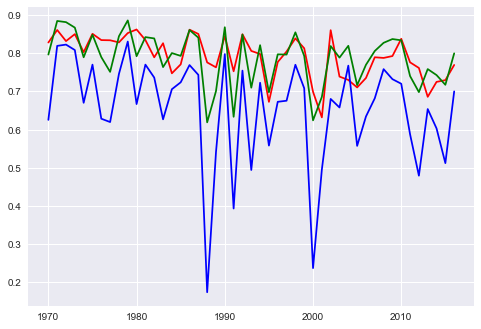

In [437]:
test_metrics_df['R2'].plot(c='r')
hav_lr_metrics_df['R2'].plot(c='b')
lin_reg_metrics_df['R2'].plot(c='g');

# 1/(X**6)

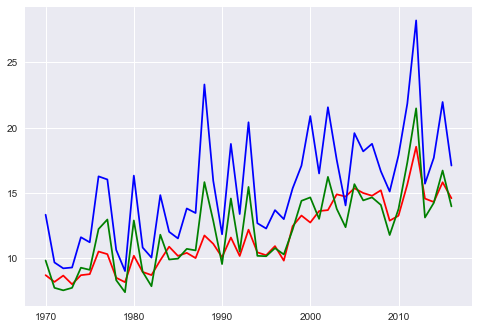

In [426]:
test_metrics_df['RMSE'].plot(c='r')
hav_lr_metrics_df['RMSE'].plot(c='b')
lin_reg_metrics_df['RMSE'].plot(c='g');

# 1/(X**8)

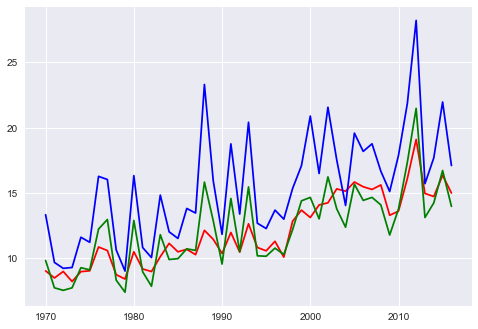

In [438]:
test_metrics_df['RMSE'].plot(c='r')
hav_lr_metrics_df['RMSE'].plot(c='b')
lin_reg_metrics_df['RMSE'].plot(c='g');

In [204]:
from math import cos, asin, sqrt, pi
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    R = 6371
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    print(a)
    return 2*R*asin(sqrt(a))

In [26]:
lat1, long1 = full_data[['latitude', 'longitude']].iloc[0]

lat1, long1

(34.4597996022, -85.8041092143)

In [25]:
lat2, long2 = full_data[['latitude', 'longitude']].iloc[1]

lat2, long2

(34.9014067395, -87.65400978)

In [206]:
distance(lat1, long1, lat2, long2)

0.00019106660940627183


176.13425630598712

In [6]:
rbf_df = pd.DataFrame(rbf_kernel(df[['latitude', 'longitude']]))

rbf_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,2719,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729,2730,2731,2732,2733,2734,2735,2736,2737,2738,2739,2740,2741,2742,2743,2744,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767
0,1.000000,0.108997,0.367142,0.798908,0.350559,0.592106,0.735749,0.333542,0.425656,0.151656,0.949463,0.235605,0.341625,0.562511,0.277774,0.425170,0.048795,0.510253,0.853357,0.429222,0.685989,0.272392,0.319604,0.878666,0.110335,0.883629,0.324025,0.265701,0.271337,0.078939,0.256778,0.403337,0.599039,0.222621,0.156807,0.065485,0.575927,0.160188,0.036463,0.111150,0.435732,0.070966,0.930258,0.629751,0.083189,0.497168,0.127853,0.176461,0.064002,...,3.497816e-35,3.407719e-40,4.226611e-32,1.173508e-26,1.755581e-38,3.214031e-40,2.597908e-44,1.829899e-33,2.974503e-41,8.231375e-24,2.327384e-29,2.560134e-24,1.820906e-41,5.561315e-42,7.365484e-29,8.460151e-44,2.590552e-34,2.880113e-28,7.447066e-39,1.241487e-35,4.241461e-31,3.374454e-42,8.280940e-24,2.888000e-45,9.263009e-27,3.435205e-25,7.849698e-33,2.643988e-31,1.746352e-30,4.321922e-34,7.591312e-98,5.886064e-131,3.934656e-108,2.539018e-108,1.171221e-101,4.605526e-102,1.127071e-129,1.180160e-88,4.439714e-131,8.084801e-116,3.716134e-88,1.491127e-112,8.086758e-94,2.991188e-146,1.233375e-93,2.887494e-122,1.892093e-141,6.309508e-125,2.989540e-98
1,0.108997,1.000000,0.034557,0.063500,0.002581,0.052004,0.343556,0.001610,0.006055,0.000277,0.063814,0.374886,0.633597,0.006990,0.001147,0.176926,0.000372,0.599372,0.029393,0.389137,0.223870,0.002111,0.083962,0.230531,0.000150,0.050555,0.789135,0.000980,0.011318,0.001003,0.158610,0.101713,0.125513,0.033779,0.048847,0.000062,0.013080,0.008858,0.000164,0.000687,0.010495,0.000183,0.203185,0.032208,0.000146,0.314202,0.002954,0.000488,0.888214,...,3.458068e-45,3.816250e-50,1.554908e-41,1.600515e-35,2.176247e-46,4.902343e-48,1.058227e-52,1.849852e-42,8.631100e-51,3.995579e-32,4.683734e-37,4.247281e-32,1.761898e-50,4.965382e-50,8.038507e-37,3.986808e-53,6.716979e-44,2.122950e-37,5.864178e-48,1.272386e-43,8.909017e-39,2.001884e-52,7.792769e-32,2.642438e-54,1.757762e-35,1.329552e-33,4.490252e-42,3.895965e-40,1.461024e-39,8.127512e-43,5.099186e-97,2.556268e-131,2.012626e-109,5.842073e-107,5.751944e-102,4.428975e-104,1.426575e-128,8.246296e-89,1.345415e-130,1.849367e-116,1.531321e-87,3.008444e-112,1.119612e-94,7.340158e-146,1.539305e-93,2.335621e-123,4.511542e-138,6.017128e-125,1.108607e-99
2,0.367142,0.034557,1.000000,0.117716,0.054036,0.924352,0.433803,0.149243,0.579398,0.068442,0.257403,0.016089,0.050310,0.336743,0.194607,0.751266,0.000993,0.252158,0.393010,0.471128,0.648518,0.026095,0.887328,0.207677,0.032096,0.576926,0.158830,0.076339,0.011501,0.001817,0.670755,0.023332,0.055106,0.928217,0.770498,0.012066,0.078153,0.004176,0.000784,0.004721,0.764675,0.003756,0.435812,0.836812,0.007785,0.052725,0.003416,0.029141,0.010661,...,4.136320e-40,5.360695e-46,5.873234e-37,6.159462e-31,2.629763e-45,2.598024e-47,1.252000e-51,6.691913e-39,1.666618e-47,5.749988e-28,5.550231e-35,5.322725e-29,4.458656e-48,3.510963e-49,3.097847e-34,1.560074e-50,1.929404e-39,1.216331e-32,4.786092e-45,5.000554e-42,5.274195e-37,4.250041e-48,3.343201e-28,2.343529e-52,3.463029e-31,1.478472e-29,5.633456e-38,1.700278e-36,2.442444e-35,8.159121e-40,2.853589e-111,1.915682e-146,3.279343e-122,2.057271e-122,2.401429e-115,1.039250e-115,4.458303e-145,1.842847e-101,1.414948e-146,2.121371e-130,6.411014e-101,6.131252e-127,5.691345e-107,1.335080e-162,8.693213e-107,3.180236e-137,2.189194e-157,4.588754e-140,1.112872e-111
3,0.798908,0.063500,0.117716,1.000000,0.527980,0.246977,0.416419,0.318482,0.221418,0.156878,0.909860,0.324611,0.325686,0.432659,0.218558,0.146392,0.186694,0.289292,0.678337,0.172142,0.322011,0.508792,0.092941,0.797372,0.143440,0.572142,0.173127,0.318657,0.638534,0.272955,0.071327,0.703632,0.857119,0.056262,0.034517

In [9]:
rbf_df.columns

RangeIndex(start=0, stop=2768, step=1)

In [13]:
rbf_df.loc[0].sum()

35.824985605603132

In [18]:
cols = df.columns.tolist()
cols_tokeep = [c for c in cols if c.startswith('1') or c.startswith('2')]

In [19]:
df[cols_tokeep]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,20.8,17.3,59.1,38.0,41.2,56.5,38.5,47.7,20.0,62.5,51.3,90.0,71.7,29.4,80.0,50.0,38.0,75.0,33.0,76.0,31.0,71.0,52.0,120.0,83.0,103.0,66.0,40.0,NaN,NaN,NaN,111.1,NaN,99.3,NaN,NaN,NaN
1,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,80.1,101.4,94.5,95.2,78.5,80.0,76.5,91.1,60.9,103.3,68.7,93.0,100.8,78.9,112.2,96.0,102.0,99.0,68.0,112.0,58.0,NaN,94.0,120.0,120.0,124.0,89.0,105.0,NaN,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9
2,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,39.5,37.9,65.0,56.8,56.4,63.0,38.2,77.0,29.4,65.4,51.0,85.2,72.1,51.4,80.0,77.0,54.0,88.0,70.0,110.0,NaN,99.0,88.0,115.0,93.0,114.0,75.0,103.0,NaN,109.0,79.4,119.6,NaN,153.8,166.3,181.6,188.9
3,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,NaN,NaN,NaN,NaN,21.7,NaN,58.6,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,14.7,53.8,68.9,35.7,56.4,91.7,66.7,86.9,54.3,85.0,65.3,96.3,123.9,57.1,95.8,61.0,94.0,94.0,83.0,119.0,53.0,127.0,94.0,128.0,139.0,NaN,NaN,NaN,NaN,110.0,NaN,109.5,70.0,137.1,144.0,128.4,NaN
5,23.0,39.0,39.2,39.7,37.0,37.0,51.0,30.0,36.0,36.9,22.0,22.1,47.8,67.5,54.0,66.7,39.0,50.0,24.0,60.0,52.0,75.0,80.0,41.0,85.5,NaN,NaN,60.0,NaN,NaN,NaN,NaN,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0,128.0,NaN,NaN,NaN
6,21.0,36.0,41.5,38.1,36.0,38.0,37.0,22.0,31.9,48.9,29.0,50.5,56.6,44.2,53.8,51.8,73.3,74.1,45.0,73.5,63.9,87.5,83.8,62.8,85.4,88.0,68.0,77.0,31.0,85.0,17.0,66.0,40.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,61.2,NaN,122.2,NaN,102.8,NaN,NaN
7,26.0,51.0,52.0,50.9,41.0,43.0,50.0,30.0,50.6,67.7,14.7,46.6,46.7,25.6,64.1,75.8,59.4,90.0,54.5,106.3,76.9,84.4,118.4,64.0,118.6,58.0,91.0,90.0,84.0,NaN,NaN,NaN,96.0,117.0,144.0,NaN,61.0,90.0,NaN,103.0,118.3,119.6,98.7,117.4,136.2,NaN,NaN
8,22.0,38.0,45.6,50.7,36.0,43.0,35.0,20.0,33.5,51.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,30.0,52.0,55.5,53.7,42.0,55.0,63.0,25.0,44.2,74.4,16.6,65.5,50.0,40.8,64.4,92.7,47.7,71.0,32.7,73.3,42.9,65.5,101.6,56.1,113.6,52.0,80.0,73.0,65.0,107.0,47.0,119.0,78.0,132.0,143.0,135.0,68.0,35.0,NaN,83.0,65.2,114.5,80.9,121.9,113.2,98.0,92.3


In [24]:
counties = np.array(df[cols_tokeep])

In [25]:
kern = np.array(rbf_df)

In [94]:
counties

array([[  23. ,   41. ,   52.5, ...,    nan,    nan,    nan],
       [  28. ,   52. ,   67.5, ...,  138.9,  147.2,  152.9],
       [  27. ,   43. ,   49.4, ...,  166.3,  181.6,  188.9],
       ..., 
       [   nan,    nan,    nan, ...,    nan,    nan,    nan],
       [  70. ,   81. ,   76. , ...,    nan,    nan,    nan],
       [   nan,   52. ,   57. , ...,    nan,    nan,    nan]])

In [89]:
kern_norm = np.array([col/col.sum() for col in kern])
kern_norm.shape

(2768, 2768)

In [92]:
kern.dot(counties)

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [103]:
counties_fill = df[cols_tokeep].copy()

In [105]:
counties_fill.fillna(0, inplace=True)
counties_fill.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,20.8,17.3,59.1,38.0,41.2,56.5,38.5,47.7,20.0,62.5,51.3,90.0,71.7,29.4,80.0,50.0,38.0,75.0,33.0,76.0,31.0,71.0,52.0,120.0,83.0,103.0,66.0,40.0,0.0,0.0,0.0,111.1,0.0,99.3,0.0,0.0,0.0
1,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,80.1,101.4,94.5,95.2,78.5,80.0,76.5,91.1,60.9,103.3,68.7,93.0,100.8,78.9,112.2,96.0,102.0,99.0,68.0,112.0,58.0,0.0,94.0,120.0,120.0,124.0,89.0,105.0,0.0,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9
2,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,39.5,37.9,65.0,56.8,56.4,63.0,38.2,77.0,29.4,65.4,51.0,85.2,72.1,51.4,80.0,77.0,54.0,88.0,70.0,110.0,0.0,99.0,88.0,115.0,93.0,114.0,75.0,103.0,0.0,109.0,79.4,119.6,0.0,153.8,166.3,181.6,188.9
3,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,0.0,0.0,0.0,0.0,21.7,0.0,58.6,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,14.7,53.8,68.9,35.7,56.4,91.7,66.7,86.9,54.3,85.0,65.3,96.3,123.9,57.1,95.8,61.0,94.0,94.0,83.0,119.0,53.0,127.0,94.0,128.0,139.0,0.0,0.0,0.0,0.0,110.0,0.0,109.5,70.0,137.1,144.0,128.4,0.0


In [107]:
rbf_df.dot(counties_fill)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,911.194889,1487.510351,1595.454029,1603.520157,1473.825711,1691.869100,1792.867983,785.791712,1407.938200,1731.003334,947.998544,1403.168156,1902.178348,1630.219883,1830.328570,2260.105854,1715.302974,2150.081398,1319.070291,2112.735938,1573.293637,2093.009745,2294.672148,1359.344329,2385.522135,1509.337057,1745.759136,2162.039538,1315.755871,2120.348086,934.591887,1451.065282,2020.412529,2488.548310,1729.075835,1474.953241,1043.462439,1189.970055,392.686923,1273.207457,1398.675691,1417.103965,1959.087991,2351.254623,2007.985072,1500.734699,1771.356766
1,487.651383,902.009629,924.190387,916.302197,871.508130,954.246296,1169.554690,593.698891,1115.436128,1121.328802,761.211408,1178.043799,1194.097266,1136.631714,1159.510942,1150.667969,1174.099853,1354.061890,816.487967,1341.698247,974.092042,1086.181767,1386.446231,934.869755,1475.622824,1030.830477,1240.582291,1207.470643,662.369308,1170.082950,557.598785,597.140647,981.233331,1269.332037,916.644984,797.172801,565.795088,740.997040,270.165770,798.709521,760.512912,390.260245,678.160870,971.317667,703.499987,513.342980,686.413333
2,1306.939675,2210.993452,2149.136291,1994.413857,2094.001888,2278.873371,2559.776760,1043.746636,1991.351890,2494.622917,1716.366351,2123.052929,2967.368290,2701.133533,2819.298092,3284.076452,2254.282845,3095.575103,2194.326235,3386.434008,2635.849482,3440.655285,3383.556218,2224.669717,3409.589760,2527.692223,2714.113168,3363.221767,2325.801444,3161.756131,2146.991836,3061.193007,3205.545795,3606.547020,3215.513899,3292.708141,2604.838133,2603.655557,1892.901655,2170.160233,2165.389413,2020.949528,3396.828848,3639.970239,2660.650118,2539.852260,2583.205333
3,898.019608,1407.985645,1553.751418,1601.808180,1441.149832,1662.509135,1757.022008,835.245764,1408.098973,1689.547883,842.468796,1405.427753,1889.495677,1517.097882,1827.517840,2294.837891,1824.032106,2139.250289,1328.502329,2039.649374,1474.592155,1955.823510,2350.107095,1384.848324,2414.939103,1619.243625,1851.936909,2065.807450,1311.154533,2074.219752,1048.793164,1566.250547,2008.363631,2479.993501,1833.449867,1548.446899,1012.953867,1226.333475,428.967763,1380.472250,1539.375523,1595.319694,1941.200986,2392.726553,2451.804512,1592.205042,1809.094602
4,1241.513398,1871.058864,2083.912517,2137.475381,1937.805787,2177.134598,2468.498849,1272.516784,1876.939422,2390.175655,1080.216846,2005.289955,2598.088337,1790.721399,2614.773848,3195.265965,2245.304103,2622.439145,1657.074817,2718.743607,2106.858278,2651.694224,3350.996062,1899.122188,3163.230331,2383.285122,2595.283549,2545.319346,2081.687106,2778.359570,1934.855124,2624.811742,2656.088734,3309.011723,3180.975035,2923.000980,1874.890116,1911.937200,1127.208528,2514.544263,2379.805044,2709.858214,2290.957467,3291.385617,3626.403612,2609.032407,2514.048553
5,1197.784484,2000.968329,1993.830654,1888.167062,1905.672892,2106.525441,2318.210988,961.287595,1783.517144,2246.934487,1458.384276,1872.402752,2606.200551,2341.549748,2470.812736,2946.643826,2034.656173,2776.930521,1874.858856,2957.643975,2274.893785,2990.977933,2974.547498,1885.099264,3008.607027,2095.166819,2291.225108,2916.322178,1922.916099,2764.766635,1602.464549,2395.394443,2738.107547,3127.456426,2604.828530,2597.547813,1995.363149,2033.206440,1260.485817,1808.522686,1804.665095,1764.514122,2783.459727,3113.933929,2253.923843,2116.897984,2284.381428
6,796.970900,1384.463360,1447.630064,1394.663197,1300.111661,1496.578942,1674.648560,754.457463,1411.066679,1649.795123,1063.241838,1483.821920,1794.040056,1676.812126,1759.907088,1988.103013,1611.374929,2046.860909,1271.565810,2110.527211,1655.176086,2082.339550,2256.080943,1442.780077,2381.268071,1615.419238,1825.198310,2224.741644,1317.767019,2212.883055,998.231697,1406.214722,2016.317068,2494.388828

In [109]:
pd.DataFrame(kern_norm).dot(counties_fill)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,25.434620,41.521590,44.534673,44.759827,41.139604,47.225953,50.045184,21.934181,39.300454,48.318326,26.461938,39.167306,53.096416,45.505109,51.090839,63.087418,47.880074,60.016253,36.819841,58.973811,43.916100,58.423185,64.052284,37.944030,66.588223,42.130849,48.730212,60.350046,36.727324,59.186293,26.087711,40.504281,56.396744,69.464042,48.264523,41.171077,29.126667,33.216205,10.961258,35.539650,39.041905,39.556302,54.684962,65.631698,56.049850,41.890727,49.444731
1,25.071230,46.374298,47.514660,47.109110,44.806149,49.059900,60.129378,30.523365,57.347024,57.649979,39.135552,60.565822,61.391166,58.436735,59.613007,59.158370,60.363055,69.615299,41.977441,68.979657,50.080213,55.842993,71.280249,48.063709,75.865013,52.997261,63.781063,62.078720,34.053862,60.156537,28.667379,30.700313,50.447363,65.259151,47.126734,40.984406,29.088769,38.096287,13.889816,41.063412,39.099641,20.064137,34.865741,49.937577,36.168481,26.392091,35.290019
2,27.821338,47.066286,45.749508,42.455871,44.575841,48.511273,54.490973,22.218645,42.390690,53.104018,36.536965,45.194262,63.167534,57.500091,60.015506,69.909425,47.987804,65.896723,46.711485,72.088351,56.110363,73.242581,72.027090,47.357418,72.581277,53.807977,57.776393,71.594223,49.510249,67.305545,45.703859,65.164818,68.237713,76.773983,68.449907,70.093172,55.450213,55.425039,40.294941,46.197053,46.095495,43.020746,72.309630,77.485476,56.638304,54.066833,54.989707
3,25.695338,40.287168,44.458013,45.833078,41.236106,47.569934,50.274263,23.899169,40.290411,48.343603,24.105844,40.213978,54.064777,43.409233,52.291384,65.662970,52.191646,61.211090,38.012885,58.361175,42.193003,55.962638,67.244407,39.625132,69.099467,46.331964,52.990095,59.109645,37.516507,59.350349,30.009472,44.815655,57.465986,70.960890,52.461119,44.306233,28.983991,35.089493,12.274199,39.499918,44.046671,45.647420,55.544238,68.463892,70.154309,45.558300,51.764234
4,29.887227,45.042415,50.166488,51.455919,46.649228,52.410644,59.424720,30.633579,45.183979,57.539228,26.004300,48.273789,62.544356,43.108433,62.946030,76.920346,54.051703,63.130559,39.891129,65.448917,50.718866,63.834823,80.669271,45.717989,76.149145,57.373351,62.476836,61.274037,50.112915,66.884066,46.578196,63.187675,63.940613,79.658572,76.576317,70.366050,45.134645,46.026488,27.135541,60.533181,57.289574,65.235017,55.150727,79.234255,87.299218,62.807815,60.521248
5,27.139323,45.337811,45.176086,42.781967,43.178613,47.729517,52.525875,21.780792,40.410816,50.910896,33.043977,42.424781,59.051124,53.054683,55.983515,66.764865,46.101108,62.919512,42.480431,67.014106,51.544396,67.769385,67.397105,42.712457,68.168824,47.472154,51.914430,66.077839,43.569309,62.643904,36.308538,54.274692,62.039864,70.861706,59.020037,58.855070,45.210809,46.068260,28.560006,40.977390,40.889985,39.980247,63.067451,70.555314,51.069261,47.964538,51.759367
6,25.135780,43.664790,45.657014,43.986484,41.004409,47.200819,52.816983,23.794943,44.503836,52.033127,33.533738,46.798474,56.582488,52.885220,55.505964,62.703068,50.821387,64.556242,40.104098,66.564222,52.202838,65.675208,71.154863,45.504049,75.103158,50.948941,57.565193,70.166448,41.561244,69.792438,31.483374,44.350809,63.592915,78.670889,55.127105,49.142400,37.511547,41.223777,17.531583,41.799320,42.270904,35.596645,56.388605,65.408767,52.225698,40.881274,52.704720
7,30.231071,46.035469,49.130937,50.410467,47.961434,52.270849,57.422505,26.783224,41.607429,55.141260,25.981981,44.791281,61.013402,43.211384,61.461913,73.222322,47.566989,57.696027,37.828683,60.801871,48.902440,62.154800,70.342602,37.918641,64.805031,46.464911,49.900037,51.565996,40.705147,53.523397,34.650502,45.974509,49.969449,59.617773,58.390651,55.161171,35.300329,34.510740,20.474879,43.421949,39.911053,46.955976,45.550687,61.956230,63.342356,46.85767

In [26]:
three = kern[:3, :3]
three

array([[ 1.        ,  0.10899749,  0.36714212],
       [ 0.10899749,  1.        ,  0.03455653],
       [ 0.36714212,  0.03455653,  1.        ]])

In [58]:
from sklearn.preprocessing import normalize

In [80]:
t3 = np.array([col/col.sum() for col in three])
t3

array([[ 0.6774427 ,  0.07383955,  0.24871775],
       [ 0.09531468,  0.87446678,  0.03021854],
       [ 0.26192657,  0.02465333,  0.71342011]])

In [81]:
years = counties[:3,:3]
years

array([[ 23. ,  41. ,  52.5],
       [ 28. ,  52. ,  67.5],
       [ 27. ,  43. ,  49.4]])

In [82]:
three.dot(years)

array([[ 35.96476688,  62.45498052,  77.99415116],
       [ 31.43996869,  57.95482805,  74.92946101],
       [ 36.41185165,  59.84976658,  71.0075272 ]])

In [84]:
years.dot(three)

array([[ 46.74385824,  45.32116031,  62.36108659],
       [ 58.44996239,  57.38449577,  79.57691905],
       [ 49.82371266,  47.65002501,  60.79876813]])

In [85]:
t3.dot(years)

array([[ 24.36406876,  42.30967059,  52.83656829],
       [ 27.49320804,  50.67957161,  65.52332416],
       [ 25.97694705,  42.6980268 ,  50.65819757]])

In [86]:
three*years

array([[ 23.        ,   4.46889709,  19.27496115],
       [  3.05192972,  52.        ,   2.33256605],
       [  9.91283716,   1.48593097,  49.4       ]])

In [87]:
years*three

array([[ 23.        ,   4.46889709,  19.27496115],
       [  3.05192972,  52.        ,   2.33256605],
       [  9.91283716,   1.48593097,  49.4       ]])

In [31]:
df.loc[2767, '1970'] = 0

In [32]:
full_df = df[['fips_code', '1970','latitude', 'longitude']].dropna()

full_df.shape

(2392, 4)

In [33]:
rbf_df = pd.DataFrame(rbf_kernel(full_df[['latitude', 'longitude']]))
rbf_df[2391].tail()

2387    0.056467
2388    0.000003
2389    0.215024
2390    0.007796
2391    1.000000
Name: 2391, dtype: float64

In [34]:
full_df['1970'].tail()

2760    60.0
2762    64.0
2763    64.0
2766    70.0
2767     0.0
Name: 1970, dtype: float64

In [35]:
full_df.tail()

,fips_code,1970,latitude,longitude
2760,56025,60.0,42.962064,-106.798504
2762,56029,64.0,44.520574,-109.588497
2763,56031,64.0,42.132960,-104.965925
2766,56043,70.0,43.904963,-107.682807
2767,56045,0.0,43.840410,-104.567652


In [38]:
norml = rbf_df[2391].values.sum()
norml

5.3225241331060849

In [37]:
test_2767 = pd.DataFrame({"fips_code": full_df['fips_code'].values, "1970": full_df['1970'].values, "2767": rbf_df[2391].values})#/norml})
test_2767

,1970,2767,fips_code
0,23.0,2.989540e-98,1001
1,28.0,1.108607e-99,1003
2,27.0,1.112872e-111,1005
3,26.0,2.633670e-92,1007
4,29.0,3.413208e-92,1009
5,23.0,7.912000e-108,1011
6,21.0,6.203466e-102,1013
7,26.0,5.152801e-99,1015
8,22.0,1.702885e-106,1017
9,30.0,4.224105e-99,1019


In [22]:
test_2767['2767'].sum()

1.2313463081307123

In [25]:
# 1/norml, 2.313463e-01
1.803513e-03


0.001803513

In [23]:
(test_2767['1970'] * test_2767['2767']).sum()

63.616573164741688

In [175]:
1.025267e-01

0.1025267

In [60]:
al_1970.dot(al).mean()

51.61443291339949

In [62]:
al_dist = dist.pairwise(np.array(al_df))
al_dist

array([[ 0.        ,  1.99613452,  1.02605663,  0.46237105,  1.44490284],
       [ 1.99613452,  0.        ,  2.42784586,  2.26907282,  2.2240375 ],
       [ 1.02605663,  2.42784586,  0.        ,  1.11524804,  1.62296067],
       [ 0.46237105,  2.26907282,  1.11524804,  0.        ,  0.98406968],
       [ 1.44490284,  2.2240375 ,  1.62296067,  0.98406968,  0.        ]])

In [42]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp

In [43]:
full_df = full_data[['latitude', 'longitude']].copy()

In [44]:
pdist(full_df, 'euclidean')

array([  1.90188038,   1.50814973,   1.22830203, ...,   0.86889735,
        15.24553848,  14.50624173])

In [45]:
pairwise_dists = squareform(pdist(full_df, 'euclidean'))

pairwise_dists

array([[  0.        ,   1.90188038,   1.50814973, ...,  10.24753846,
         10.85665179,  20.05644345],
       [  1.90188038,   0.        ,   0.51172097, ...,   9.34774861,
          9.84774493,  18.18000135],
       [  1.50814973,   0.51172097,   0.        , ...,   9.78408128,
         10.30212305,  18.64640921],
       ..., 
       [ 10.24753846,   9.34774861,   9.78408128, ...,   0.        ,
          0.86889735,  15.24553848],
       [ 10.85665179,   9.84774493,  10.30212305, ...,   0.86889735,
          0.        ,  14.50624173],
       [ 20.05644345,  18.18000135,  18.64640921, ...,  15.24553848,
         14.50624173,   0.        ]])

In [49]:
pairwise_dists[:-5,:-5]

array([[  0.        ,   1.90188038,   1.50814973, ...,   8.65322547,
         12.91146972,   9.23325157],
       [  1.90188038,   0.        ,   0.51172097, ...,   7.81767399,
         11.75026002,   8.48668557],
       [  1.50814973,   0.51172097,   0.        , ...,   8.23928594,
         12.22788539,   8.89447827],
       ..., 
       [  8.65322547,   7.81767399,   8.23928594, ...,   0.        ,
          4.58208876,   0.76604601],
       [ 12.91146972,  11.75026002,  12.22788539, ...,   4.58208876,
          0.        ,   4.36828031],
       [  9.23325157,   8.48668557,   8.89447827, ...,   0.76604601,
          4.36828031,   0.        ]])

In [35]:
wy_df = df[-5:][['latitude', 'longitude']]
al_df = df[:5][['latitude', 'longitude']]

test_df = al_df.append(wy_df)
test_df

,latitude,longitude
0,32.534922,-86.642743
1,30.727483,-87.722570
2,31.869583,-85.393209
3,32.998628,-87.126475
4,33.980872,-86.567379
2763,42.132960,-104.965925
2764,44.790032,-106.879399
2765,41.287642,-110.547628
2766,43.904963,-107.682807
2767,43.840410,-104.567652


In [80]:
pd.DataFrame(rbf_kernel(test_df))

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,1.089975e-01,3.671421e-01,7.989075e-01,3.505593e-01,1.233375e-93,2.887494e-122,1.892093e-141,6.309508e-125,2.989540e-98
1,1.089975e-01,1.000000e+00,3.455653e-02,6.350011e-02,2.581197e-03,1.539305e-93,2.335621e-123,4.511542e-138,6.017128e-125,1.108607e-99
2,3.671421e-01,3.455653e-02,1.000000e+00,1.177163e-01,5.403581e-02,8.693213e-107,3.180236e-137,2.189194e-157,4.588754e-140,1.112872e-111
3,7.989075e-01,6.350011e-02,1.177163e-01,1.000000e+00,5.279805e-01,5.968529e-88,1.208856e-115,9.206543e-135,2.584587e-118,2.633670e-92
4,3.505593e-01,2.581197e-03,5.403581e-02,5.279805e-01,1.000000e+00,1.157161e-88,1.093320e-115,3.433342e-137,6.253614e-119,3.413208e-92
5,1.233375e-93,1.539305e-93,8.693213e-107,5.968529e-88,1.157161e-88,1.000000e+00,4.697574e-03,1.200946e-07,5.191542e-03,2.150244e-01
6,2.887494e-122,2.335621e-123,3.180236e-137,1.208856e-115,1.093320e-115,4.697574e-03,1.000000e+00,2.596575e-06,4.894831e-01,4.402586e-02
7,1.892093e-141,4.511542e-138,2.189194e-157,9.206543e-135,3.433342e-137,1.200946e-07,2.596575e-06,1.000000e+00,5.373916e-04,6.602745e-10
8,6.309508e-125,6.017128e-125,4.588754e-140,2.584587e-118,6.253614e-119,5.191542e-03,4.894831e-01,5.373916e-04,1.000000e+00,7.795729e-03
9,2.989540e-98,1.108607e-99,1.112872e-111,2.633670e-92,3.413208e-92,2.150244e-01,4.402586e-02,6.602745e-10,7.795729e-03,1.000000e+00


In [81]:
rbf_kernel(al_df)

array([[ 1.        ,  0.10899749,  0.36714212,  0.79890752,  0.35055926],
       [ 0.10899749,  1.        ,  0.03455653,  0.06350011,  0.0025812 ],
       [ 0.36714212,  0.03455653,  1.        ,  0.11771625,  0.05403581],
       [ 0.79890752,  0.06350011,  0.11771625,  1.        ,  0.52798048],
       [ 0.35055926,  0.0025812 ,  0.05403581,  0.52798048,  1.        ]])

In [87]:
rbf_kernel(al_df)[0]

array([ 1.        ,  0.10899749,  0.36714212,  0.79890752,  0.35055926])

In [83]:
al_1970 = np.array(df[:5][['1970', '1971', '1972','1973', '1974']])

al_1970

In [85]:
al_1975 = np.array(df[:5]['1975'])
al_1975

array([ 59.,  62.,  50.,  35.,  42.])

In [89]:
al_1976 = np.array(df[:5]['1976'])
al_1976

array([  45.,  100.,   53.,   44.,   53.])

In [ ]:
wy_df = df[-5:][['latitude', 'longitude']]
al_df = df[:5][['latitude', 'longitude']]

In [40]:
4.697574e-03

0.004697574

In [35]:
dist = DistanceMetric.get_metric("euclidean")

In [38]:
full_df = df[['latitude', 'longitude']].copy()

dist.pairwise(full_df)

array([[  0.        ,   2.10543602,   1.4156315 , ...,  25.45689748,
         23.91573034,  21.19236747],
       [  2.10543602,   0.        ,   2.5942855 , ...,  25.14955681,
         23.91771421,  21.34726306],
       [  1.4156315 ,   2.5942855 ,   0.        , ...,  26.85972174,
         25.3313365 ,  22.60442441],
       ..., 
       [ 25.45689748,  25.14955681,  26.85972174, ...,   0.        ,
          3.88040808,   6.50205591],
       [ 23.91573034,  23.91771421,  25.3313365 , ...,   3.88040808,
          0.        ,   3.11582388],
       [ 21.19236747,  21.34726306,  22.60442441, ...,   6.50205591,
          3.11582388,   0.        ]])

In [39]:
dist_df = pd.DataFrame(dist.pairwise(full_df))

-----